In [3]:
import numpy as np
from sklearn.neighbors import KernelDensity

In [24]:
data = {"est_win_pct": "-82", "home_points": ["78.923225", "73.35068", "86.85839", "67.96912", "65.12559", "73.37146", "89.58173", "66.338356", "55.421288", "91.750824", "71.0882", "77.3079", "68.619804", "67.29383", "71.8433", "68.102974", "67.05578", "69.58545", "69.19626", "70.20428", "66.40054", "72.40319", "77.38375", "70.087456", "65.75818", "68.052574", "66.050934", "67.64576", "64.59095", "73.31338", "71.81116", "65.81189", "75.10493", "68.67745", "89.767235", "84.44041", "89.05643", "67.9035", "73.46311", "61.621696", "74.099434", "73.438805", "65.962555", "76.203636", "65.82938", "73.286934", "74.53382", "63.964165", "67.79931", "80.39031", "78.26924", "62.284595", "73.58041", "67.0523", "72.14096", "81.98786", "94.47508", "67.01784", "79.68041", "77.79087", "75.400406", "76.10046", "69.17995", "68.44569", "75.79526", "67.717094", "67.36122", "79.580025", "77.6114", "75.36996", "76.74906", "61.828182", "93.5922", "71.74168", "65.95032", "77.20193", "57.832756", "76.10708", "67.65817", "68.094", "64.33061", "63.88642", "62.82636", "69.983505", "73.82236", "64.45774", "66.795876", "66.18243", "70.54987", "61.795715", "76.58047", "76.11562", "101.32966", "73.57417", "80.58311", "71.78369", "61.23381", "63.866592", "114.52602", "89.13041"], "away_points": ["82.32403", "77.021866", "89.55513", "75.22037", "73.60305", "80.223305", "91.85814", "73.314735", "66.65235", "94.25559", "77.83608", "80.770386", "76.37307", "71.49738", "71.77884", "75.0881", "74.46662", "76.048775", "73.164116", "80.098045", "63.351807", "73.86818", "80.50425", "67.51769", "72.18984", "75.14832", "71.59048", "75.60827", "68.00342", "69.55077", "72.37789", "71.600975", "78.28693", "77.821846", "92.48985", "89.14828", "91.67481", "74.32422", "74.99398", "67.54713", "77.145", "77.78489", "69.37731", "79.75875", "63.6389", "79.408714", "77.87025", "74.35978", "72.37822", "84.13188", "79.97528", "69.16702", "78.89025", "76.45714", "74.05218", "86.4049", "96.35842", "72.32403", "81.55164", "80.8503", "75.4654", "80.56817", "76.472466", "75.858345", "76.02671", "75.53229", "76.49313", "82.96545", "82.41472", "72.998085", "80.05102", "73.91976", "95.61663", "80.89734", "72.89449", "81.136475", "67.31252", "80.199196", "76.69273", "68.76333", "74.38673", "72.71845", "72.185814", "74.80145", "80.00957", "71.695854", "72.687645", "77.79907", "76.85215", "68.5174", "79.18193", "74.8399", "101.249504", "79.68247", "84.34716", "75.00004", "67.783356", "74.26353", "112.94834", "91.9682"], "over_under_x": ["102.54655914813137", "102.68776627017841", "102.82897339222545", "102.9701805142725", "103.11138763631955", "103.2525947583666", "103.39380188041363", "103.53500900246068", "103.67621612450773", "103.81742324655478", "103.95863036860182", "104.09983749064887", "104.24104461269592", "104.38225173474297", "104.52345885679", "104.66466597883705", "104.8058731008841", "104.94708022293115", "105.08828734497818", "105.22949446702523", "105.37070158907228", "105.51190871111933", "105.65311583316637", "105.79432295521342", "105.93553007726047", "106.07673719930752", "106.21794432135455", "106.3591514434016", "106.50035856544865", "106.6415656874957", "106.78277280954273", "106.92397993158978", "107.06518705363683", "107.20639417568388", "107.34760129773092", "107.48880841977797", "107.63001554182502", "107.77122266387207", "107.9124297859191", "108.05363690796615", "108.1948440300132", "108.33605115206025", "108.47725827410729", "108.61846539615433", "108.75967251820138", "108.90087964024843", "109.04208676229547", "109.18329388434252", "109.32450100638957", "109.46570812843662", "109.60691525048365", "109.7481223725307", "109.88932949457775", "110.0305366166248", "110.17174373867184", "110.31295086071889", "110.45415798276593", "110.59536510481297", "110.73657222686002", "110.87777934890707", "111.01898647095412", "111.16019359300117", "111.3014007150482", "111.44260783709525", "111.5838149591423", "111.72502208118934", "111.86622920323639", "112.00743632528344", "112.14864344733049", "112.28985056937753", "112.43105769142457", "112.57226481347162", "112.71347193551867", "112.8546790575657", "112.99588617961275", "113.1370933016598", "113.27830042370685", "113.4195075457539", "113.56071466780094", "113.70192178984799", "113.84312891189504", "113.98433603394207", "114.12554315598912", "114.26675027803617", "114.40795740008322", "114.54916452213025", "114.6903716441773", "114.83157876622435", "114.9727858882714", "115.11399301031844", "115.25520013236549", "115.39640725441254", "115.53761437645959", "115.67882149850662", "115.82002862055367", "115.96123574260072", "116.10244286464777", "116.2436499866948", "116.38485710874185", "116.5260642307889", "116.66727135283595", "116.80847847488299", "116.94968559693004", "117.09089271897709", "117.23209984102414", "117.37330696307117", "117.51451408511822", "117.65572120716527", "117.79692832921232", "117.93813545125936", "118.0793425733064", "118.22054969535345", "118.3617568174005", "118.50296393944754", "118.64417106149459", "118.78537818354164", "118.92658530558867", "119.06779242763572", "119.20899954968277", "119.35020667172982", "119.49141379377687", "119.6326209158239", "119.77382803787096", "119.915035159918", "120.05624228196504", "120.19744940401209", "120.33865652605914", "120.47986364810619", "120.62107077015324", "120.76227789220027", "120.90348501424732", "121.04469213629437", "121.18589925834141", "121.32710638038846", "121.4683135024355", "121.60952062448256", "121.7507277465296", "121.89193486857664", "122.03314199062369", "122.17434911267074", "122.31555623471777", "122.45676335676482", "122.59797047881187", "122.73917760085892", "122.88038472290597", "123.02159184495301", "123.16279896700006", "123.3040060890471", "123.44521321109414", "123.58642033314119", "123.72762745518824", "123.86883457723529", "124.01004169928234", "124.15124882132938", "124.29245594337642", "124.43366306542347", "124.57487018747051", "124.71607730951756", "124.85728443156461", "124.99849155361166", "125.1396986756587", "125.28090579770574", "125.42211291975279", "125.56332004179984", "125.70452716384688", "125.84573428589393", "125.98694140794098", "126.12814852998801", "126.26935565203506", "126.41056277408211", "126.55176989612916", "126.69297701817621", "126.83418414022324", "126.97539126227029", "127.11659838431734", "127.25780550636438", "127.39901262841143", "127.54021975045848", "127.68142687250553", "127.82263399455258", "127.96384111659961", "128.10504823864665", "128.2462553606937", "128.38746248274074", "128.5286696047878", "128.66987672683484", "128.81108384888188", "128.95229097092894", "129.09349809297598", "129.23470521502304", "129.37591233707008", "129.5171194591171", "129.65832658116418", "129.7995337032112", "129.94074082525825", "130.0819479473053", "130.22315506935234", "130.36436219139938", "130.50556931344644", "130.64677643549348", "130.78798355754054", "130.92919067958758", "131.0703978016346", "131.21160492368168", "131.3528120457287", "131.49401916777578", "131.6352262898228", "131.77643341186985", "131.9176405339169", "132.05884765596394", "132.20005477801098", "132.34126190005804", "132.48246902210508", "132.6236761441521", "132.76488326619918", "132.9060903882462", "133.04729751029328", "133.1885046323403", "133.32971175438735", "133.4709188764344", "133.61212599848145", "133.7533331205285", "133.89454024257554", "134.03574736462258", "134.17695448666962", "134.31816160871668", "134.4593687307637", "134.60057585281078", "134.7417829748578", "134.88299009690485", "135.0241972189519", "135.16540434099895", "135.306611463046", "135.44781858509305", "135.58902570714008", "135.73023282918714", "135.87143995123418", "136.01264707328124", "136.15385419532828", "136.2950613173753", "136.43626843942235", "136.5774755614694", "136.71868268351645", "136.8598898055635", "137.00109692761055", "137.14230404965758", "137.28351117170465", "137.42471829375168", "137.56592541579874", "137.70713253784578", "137.84833965989282", "137.98954678193988", "138.1307539039869", "138.27196102603398", "138.413168148081", "138.55437527012805", "138.69558239217508", "138.83678951422215", "138.97799663626918", "139.11920375831625", "139.26041088036328", "139.40161800241032", "139.54282512445738", "139.68403224650442", "139.82523936855148", "139.9664464905985", "140.10765361264555", "140.24886073469258", "140.39006785673965", "140.53127497878668", "140.67248210083375", "140.81368922288078", "140.95489634492782", "141.09610346697488", "141.23731058902192", "141.37851771106898", "141.51972483311602", "141.66093195516305", "141.80213907721011", "141.94334619925715", "142.0845533213042", "142.22576044335125", "142.36696756539828", "142.50817468744532", "142.64938180949238", "142.79058893153942", "142.93179605358648", "143.07300317563352", "143.21421029768055", "143.35541741972762", "143.49662454177465", "143.63783166382171", "143.77903878586875", "143.92024590791578", "144.06145302996285", "144.20266015200988", "144.34386727405695", "144.48507439610398", "144.62628151815102", "144.76748864019805", "144.90869576224512", "145.04990288429215", "145.19111000633922", "145.33231712838625", "145.4735242504333", "145.61473137248035", "145.75593849452738", "145.89714561657445", "146.03835273862148", "146.17955986066852", "146.32076698271558", "146.46197410476262", "146.60318122680968", "146.74438834885672", "146.88559547090375", "147.0268025929508", "147.16800971499785", "147.3092168370449", "147.45042395909195", "147.59163108113898", "147.73283820318602", "147.87404532523308", "148.01525244728012", "148.15645956932718", "148.29766669137422", "148.43887381342125", "148.5800809354683", "148.72128805751535", "148.8624951795624", "149.00370230160945", "149.1449094236565", "149.28611654570352", "149.42732366775058", "149.56853078979762", "149.70973791184468", "149.85094503389172", "149.99215215593875", "150.13335927798582", "150.27456640003285", "150.41577352207992", "150.55698064412695", "150.698187766174", "150.83939488822102", "150.9806020102681", "151.12180913231512", "151.26301625436219", "151.40422337640922", "151.54543049845626", "151.68663762050332", "151.82784474255035", "151.96905186459742", "152.11025898664445", "152.2514661086915", "152.39267323073855", "152.5338803527856", "152.67508747483265", "152.8162945968797", "152.95750171892672", "153.09870884097376", "153.23991596302082", "153.38112308506786", "153.52233020711492", "153.66353732916195", "153.804744451209", "153.94595157325605", "154.0871586953031", "154.22836581735015", "154.3695729393972", "154.51078006144422", "154.6519871834913", "154.79319430553832", "154.93440142758539", "155.07560854963242", "155.21681567167946", "155.3580227937265", "155.49922991577355", "155.6404370378206", "155.78164415986765", "155.9228512819147", "156.06405840396172", "156.2052655260088", "156.34647264805582", "156.4876797701029", "156.62888689214992", "156.77009401419696", "156.911301136244", "157.05250825829106", "157.1937153803381", "157.33492250238515", "157.4761296244322", "157.61733674647922", "157.7585438685263", "157.89975099057332", "158.0409581126204", "158.18216523466742", "158.32337235671446", "158.46457947876152", "158.60578660080856", "158.74699372285562", "158.88820084490266", "159.0294079669497", "159.17061508899673", "159.3118222110438", "159.45302933309083", "159.5942364551379", "159.73544357718492", "159.87665069923196", "160.01785782127902", "160.15906494332606", "160.30027206537312", "160.44147918742016", "160.5826863094672", "160.72389343151426", "160.8651005535613", "161.00630767560835", "161.1475147976554", "161.28872191970243", "161.42992904174946", "161.57113616379652", "161.71234328584356", "161.85355040789062", "161.99475752993766", "162.1359646519847", "162.27717177403176", "162.4183788960788", "162.55958601812586", "162.7007931401729", "162.84200026221993", "162.983207384267", "163.12441450631403", "163.2656216283611", "163.40682875040812", "163.54803587245516", "163.6892429945022", "163.83045011654926", "163.9716572385963", "164.11286436064336", "164.2540714826904", "164.39527860473743", "164.5364857267845", "164.67769284883153", "164.8188999708786", "164.96010709292563", "165.10131421497266", "165.24252133701972", "165.38372845906676", "165.52493558111382", "165.66614270316086", "165.8073498252079", "165.94855694725493", "166.089764069302", "166.23097119134903", "166.3721783133961", "166.51338543544313", "166.65459255749016", "166.7957996795372", "166.93700680158426", "167.07821392363132", "167.21942104567836", "167.3606281677254", "167.50183528977243", "167.6430424118195", "167.78424953386656", "167.9254566559136", "168.06666377796063", "168.20787090000766", "168.34907802205473", "168.49028514410176", "168.63149226614883", "168.77269938819586", "168.9139065102429", "169.05511363228993", "169.196320754337", "169.33752787638406", "169.4787349984311", "169.61994212047813", "169.76114924252516", "169.90235636457223", "170.0435634866193", "170.18477060866633", "170.32597773071336", "170.4671848527604", "170.60839197480746", "170.7495990968545", "170.89080621890156", "171.0320133409486", "171.17322046299563", "171.31442758504267", "171.45563470708973", "171.5968418291368", "171.73804895118383", "171.87925607323086", "172.0204631952779", "172.16167031732496", "172.30287743937203", "172.44408456141906", "172.5852916834661", "172.72649880551313", "172.8677059275602", "173.00891304960723", "173.1501201716543", "173.29132729370133", "173.43253441574836", "173.5737415377954", "173.71494865984246", "173.85615578188953", "173.99736290393656", "174.1385700259836", "174.27977714803063", "174.4209842700777", "174.56219139212476", "174.7033985141718", "174.84460563621883", "174.98581275826587", "175.1270198803129", "175.26822700235996", "175.40943412440703", "175.55064124645406", "175.6918483685011", "175.83305549054813", "175.9742626125952", "176.11546973464226", "176.2566768566893", "176.39788397873633", "176.53909110078337", "176.68029822283043", "176.82150534487747", "176.96271246692453", "177.10391958897156", "177.2451267110186", "177.38633383306563", "177.5275409551127", "177.66874807715976", "177.8099551992068", "177.95116232125383", "178.09236944330087", "178.23357656534793", "178.374783687395", "178.51599080944203", "178.65719793148907", "178.7984050535361", "178.93961217558316", "179.0808192976302", "179.22202641967726", "179.3632335417243", "179.50444066377133", "179.64564778581837", "179.78685490786543", "179.9280620299125", "180.06926915195953", "180.21047627400657", "180.3516833960536", "180.49289051810067", "180.63409764014773", "180.77530476219476", "180.9165118842418", "181.05771900628883", "181.1989261283359", "181.34013325038293", "181.48134037243", "181.62254749447703", "181.76375461652407", "181.9049617385711", "182.04616886061817", "182.18737598266523", "182.32858310471227", "182.4697902267593", "182.61099734880634", "182.7522044708534", "182.89341159290046", "183.0346187149475", "183.17582583699453", "183.31703295904157", "183.45824008108863", "183.59944720313567", "183.74065432518273", "183.88186144722977", "184.0230685692768", "184.16427569132384", "184.3054828133709", "184.44668993541796", "184.587897057465", "184.72910417951203", "184.87031130155907", "185.01151842360613", "185.15272554565317", "185.29393266770023", "185.43513978974727", "185.5763469117943", "185.71755403384134", "185.8587611558884", "185.99996827793547", "186.1411753999825", "186.28238252202954", "186.42358964407657", "186.56479676612364", "186.7060038881707", "186.84721101021773", "186.98841813226477", "187.1296252543118", "187.27083237635887", "187.4120394984059", "187.55324662045297", "187.6944537425", "187.83566086454704", "187.97686798659407", "188.11807510864114", "188.2592822306882", "188.40048935273524", "188.54169647478227", "188.6829035968293", "188.82411071887637", "188.96531784092343", "189.10652496297047", "189.2477320850175", "189.38893920706454", "189.5301463291116", "189.67135345115864", "189.8125605732057", "189.95376769525274", "190.09497481729977", "190.2361819393468", "190.37738906139387", "190.51859618344093", "190.65980330548797", "190.801010427535", "190.94221754958204", "191.0834246716291", "191.22463179367617", "191.3658389157232", "191.50704603777024", "191.64825315981727", "191.78946028186434", "191.93066740391137", "192.07187452595844", "192.21308164800547", "192.3542887700525", "192.49549589209954", "192.6367030141466", "192.77791013619367", "192.9191172582407", "193.06032438028774", "193.20153150233477", "193.34273862438184", "193.48394574642887", "193.62515286847594", "193.76635999052297", "193.90756711257", "194.04877423461704", "194.1899813566641", "194.33118847871117", "194.4723956007582", "194.61360272280524", "194.75480984485228", "194.89601696689934", "195.0372240889464", "195.17843121099344", "195.31963833304047", "195.4608454550875", "195.60205257713457", "195.7432596991816", "195.88446682122867", "196.0256739432757", "196.16688106532274", "196.30808818736978", "196.44929530941684", "196.5905024314639", "196.73170955351094", "196.87291667555797", "197.014123797605", "197.15533091965207", "197.29653804169914", "197.43774516374617", "197.5789522857932", "197.72015940784024", "197.8613665298873", "198.00257365193434", "198.1437807739814", "198.28498789602844", "198.42619501807548", "198.5674021401225", "198.70860926216957", "198.84981638421664", "198.99102350626367", "199.1322306283107", "199.27343775035774", "199.4146448724048", "199.55585199445187", "199.6970591164989", "199.83826623854594", "199.97947336059298", "200.12068048264004", "200.26188760468708", "200.40309472673414", "200.54430184878117", "200.6855089708282", "200.82671609287524", "200.9679232149223", "201.10913033696937", "201.2503374590164", "201.39154458106344", "201.53275170311048", "201.67395882515754", "201.8151659472046", "201.95637306925164", "202.09758019129868", "202.2387873133457", "202.37999443539275", "202.5212015574398", "202.66240867948687", "202.8036158015339", "202.94482292358094", "203.08603004562798", "203.22723716767504", "203.3684442897221", "203.50965141176914", "203.65085853381618", "203.7920656558632", "203.93327277791028", "204.0744798999573", "204.21568702200437", "204.3568941440514", "204.49810126609844", "204.63930838814548", "204.78051551019254", "204.9217226322396", "205.06292975428664", "205.20413687633368", "205.3453439983807", "205.48655112042778", "205.62775824247484", "205.76896536452188", "205.9101724865689", "206.05137960861595", "206.192586730663", "206.33379385271004", "206.4750009747571", "206.61620809680414", "206.75741521885118", "206.8986223408982", "207.03982946294528", "207.18103658499234", "207.32224370703938", "207.4634508290864", "207.60465795113345", "207.7458650731805", "207.88707219522757", "208.0282793172746", "208.16948643932164", "208.31069356136868", "208.45190068341574", "208.59310780546278", "208.73431492750984", "208.87552204955688", "209.0167291716039", "209.15793629365095", "209.299143415698", "209.44035053774508", "209.5815576597921", "209.72276478183915", "209.86397190388618", "210.00517902593324", "210.1463861479803", "210.28759327002734", "210.42880039207438", "210.57000751412141", "210.71121463616848", "210.8524217582155", "210.99362888026258", "211.1348360023096", "211.27604312435665", "211.41725024640368", "211.55845736845075", "211.6996644904978", "211.84087161254484", "211.98207873459188", "212.12328585663892", "212.26449297868598", "212.40570010073301", "212.54690722278008", "212.6881143448271", "212.82932146687415", "212.97052858892118", "213.11173571096825", "213.2529428330153", "213.39414995506235", "213.53535707710938", "213.67656419915642", "213.81777132120348", "213.95897844325054", "214.10018556529758", "214.24139268734461", "214.38259980939165", "214.5238069314387", "214.66501405348575", "214.8062211755328", "214.94742829757985", "215.08863541962688", "215.22984254167392", "215.37104966372098", "215.51225678576805", "215.65346390781508", "215.79467102986212", "215.93587815190915", "216.07708527395621", "216.21829239600328", "216.3594995180503", "216.50070664009735", "216.64191376214438", "216.78312088419145", "216.92432800623848", "217.06553512828555", "217.20674225033258", "217.34794937237962", "217.48915649442665", "217.63036361647372", "217.77157073852078", "217.91277786056781", "218.05398498261485", "218.19519210466188", "218.33639922670895", "218.477606348756", "218.61881347080305", "218.76002059285008", "218.90122771489712", "219.04243483694418", "219.18364195899122", "219.32484908103828", "219.46605620308532", "219.60726332513235", "219.7484704471794", "219.88967756922645", "220.0308846912735", "220.17209181332055", "220.31329893536758", "220.45450605741462", "220.59571317946168", "220.73692030150872", "220.87812742355578", "221.01933454560282", "221.16054166764985", "221.3017487896969", "221.44295591174395", "221.58416303379101", "221.72537015583805", "221.86657727788509", "222.00778439993212", "222.14899152197918", "222.29019864402625", "222.43140576607328", "222.57261288812032", "222.71382001016735", "222.85502713221442", "222.99623425426145", "223.13744137630852", "223.27864849835555", "223.4198556204026", "223.56106274244962", "223.70226986449669", "223.84347698654375", "223.98468410859078", "224.12589123063782", "224.26709835268485", "224.40830547473192", "224.54951259677898", "224.69071971882602", "224.83192684087305", "224.9731339629201", "225.11434108496715", "225.2555482070142", "225.39675532906125", "225.53796245110829", "225.67916957315532", "225.82037669520236", "225.96158381724942", "226.10279093929648", "226.24399806134352", "226.38520518339055", "226.5264123054376", "226.66761942748465", "226.80882654953172", "226.95003367157875", "227.0912407936258", "227.23244791567282", "227.37365503771989", "227.51486215976692", "227.65606928181398", "227.79727640386102", "227.93848352590805", "228.0796906479551", "228.22089777000215", "228.36210489204922", "228.50331201409625", "228.6445191361433", "228.78572625819032", "228.9269333802374", "229.06814050228442", "229.20934762433149", "229.35055474637852", "229.49176186842556", "229.6329689904726", "229.77417611251965", "229.91538323456672", "230.05659035661375", "230.1977974786608", "230.33900460070782", "230.4802117227549", "230.62141884480192", "230.762625966849", "230.90383308889602", "231.04504021094306", "231.18624733299012", "231.32745445503716", "231.46866157708422", "231.60986869913125", "231.7510758211783", "231.89228294322535", "232.0334900652724", "232.17469718731942", "232.3159043093665", "232.45711143141352", "232.5983185534606", "232.73952567550762", "232.88073279755466", "233.02193991960172", "233.16314704164876", "233.3043541636958", "233.44556128574285", "233.5867684077899", "233.72797552983695", "233.869182651884", "234.01038977393102", "234.1515968959781", "234.29280401802512", "234.43401114007216", "234.57521826211922", "234.71642538416626", "234.85763250621332", "234.99883962826036", "235.1400467503074", "235.28125387235445", "235.4224609944015", "235.56366811644853", "235.7048752384956", "235.84608236054262", "235.9872894825897", "236.12849660463672", "236.26970372668376", "236.41091084873082", "236.55211797077786", "236.6933250928249", "236.83453221487196", "236.975739336919", "237.11694645896605", "237.2581535810131", "237.39936070306013", "237.5405678251072", "237.68177494715422", "237.82298206920126", "237.96418919124832", "238.10539631329536", "238.2466034353424", "238.38781055738946", "238.5290176794365", "238.67022480148356", "238.8114319235306", "238.95263904557763", "239.0938461676247", "239.23505328967173", "239.37626041171876", "239.51746753376582", "239.65867465581286", "239.79988177785992", "239.94108889990696", "240.082296021954", "240.22350314400106", "240.3647102660481", "240.50591738809513", "240.6471245101422", "240.78833163218923", "240.9295387542363", "241.07074587628333", "241.21195299833036", "241.35316012037742", "241.49436724242446", "241.6355743644715", "241.77678148651856", "241.9179886085656", "242.05919573061266", "242.2004028526597", "242.34160997470673", "242.4828170967538", "242.62402421880083", "242.76523134084786", "242.90643846289493", "243.04764558494196", "243.18885270698902", "243.33005982903606", "243.4712669510831", "243.61247407313016", "243.7536811951772", "243.89488831722423", "244.0360954392713", "244.17730256131833", "244.3185096833654", "244.45971680541243", "244.60092392745946", "244.74213104950653", "244.88333817155356", "245.0245452936006", "245.16575241564766", "245.3069595376947", "245.44816665974176", "245.5893737817888", "245.73058090383583", "245.8717880258829", "246.01299514792993", "246.15420226997696", "246.29540939202403", "246.43661651407106", "246.57782363611813", "246.71903075816516", "246.8602378802122", "247.00144500225926"], "over_under_y": ["7.326426820752084e-07", "1.1003186287409741e-06", "1.2094469960469659e-06", "1.3284798674669436e-06", "1.458219417605509e-06", "1.5995231845058713e-06", "1.7533069911331486e-06", "1.9205479399856766e-06", "2.102287474931554e-06", "2.2996345034426364e-06", "2.5137685714297455e-06", "2.745943081843365e-06", "2.997488547281698e-06", "3.2698158655768907e-06", "3.5644196063301915e-06", "3.882881295191793e-06", "4.226872681370555e-06", "4.598158972853502e-06", "4.998602022250495e-06", "5.430163445370255e-06", "5.8949076528864635e-06", "6.3950047746079786e-06", "7.919386592749846e-06", "8.636135973800175e-06", "9.367853509918834e-06", "1.0154808589727516e-05", "1.1000553797982309e-05", "1.190881748816167e-05", "1.2883508215028079e-05", "1.3928718924156426e-05", "1.504873086185858e-05", "1.6248017167421663e-05", "1.753124610800518e-05", "1.8903283915089452e-05", "2.0369197179995457e-05", "2.1934254764872403e-05", "2.3603929184332298e-05", "2.5383897412096214e-05", "2.7280041066238043e-05", "2.9298445926011496e-05", "3.1445400732931594e-05", "3.372739522870567e-05", "3.615111738256398e-05", "3.872344976114694e-05", "4.1451464994568695e-05", "4.434242029332073e-05", "4.740375097187746e-05", "5.064306293650153e-05", "5.4068124096569105e-05", "5.824215144613172e-05", "6.30692228888415e-05", "6.780289245369985e-05", "7.263092793726665e-05", "7.805793431261321e-05", "8.348356538806343e-05", "8.956116470887531e-05", "9.53143660748441e-05", "0.00010137690910691807", "0.00010813409251081749", "0.00011554450838610023", "0.00012271659429824897", "0.00013025886236193212", "0.00013818543470423157", "0.00014651067576103012", "0.0001552491797356083", "0.00016441575706195284", "0.00017433390459677017", "0.0001851513814838975", "0.00019579824351685188", "0.00020694386624471925", "0.00021860468343183804", "0.0002307972971087405", "0.00024353845999100686", "0.00025684505701198455", "0.0002709473513815228", "0.0002862711556315794", "0.00030148078762177565", "0.00031733383385547316", "0.0003338483080594666", "0.0003510422810959683", "0.0003689338593850979", "0.0003875411625755465", "0.0004068823004629735", "0.00042697534915377833", "0.00044783832646943714", "0.00046948916658425216", "0.0004919456938867085", "0.0005152255960517451", "0.0005393463963085833", "0.0005643254248857873", "0.0005901797896122044", "0.000617013793416229", "0.0006456176341396622", "0.0006743012207222957", "0.0007047204255700981", "0.0007356413006325628", "0.0007673340542819814", "0.0008009332826659426", "0.0008348764455834043", "0.0008697531480456253", "0.0009067180249323047", "0.0009438397078604288", "0.000982065554498207", "0.0010222386853535172", "0.001063018453221281", "0.001105766458772567", "0.001148778499362778", "0.0011929856970258582", "0.001238488318217859", "0.0012860772223970247", "0.0013352754261592758", "0.0013854674125035624", "0.0014364912698925716", "0.0014892744788356001", "0.0015437403920792248", "0.0015992707492970978", "0.0016559526133493822", "0.0017136701064093432", "0.001774766741235359", "0.0018375416127161825", "0.0018999508708634418", "0.0019637721961678544", "0.0020295067452959464", "0.0020973652063847334", "0.002166630469670879", "0.0022374880944788177", "0.0023091727290086485", "0.002382426425560206", "0.002457780896317956", "0.0025347705099710146", "0.002612913236751381", "0.002692683075007478", "0.0027740917523883784", "0.002857150566481453", "0.002941870373029681", "0.0030282615741472566", "0.0031163341065280925", "0.0032060974296341874", "0.003298568301514969", "0.0033918595888618947", "0.0034868587255957174", "0.0035835915893330282", "0.003682065889863927", "0.00378334972755398", "0.0038864274626917343", "0.003990381909409456", "0.0040961230920817555", "0.004204149826245271", "0.004314068407212445", "0.004425760308533695", "0.004543017751694146", "0.0046589190283091095", "0.004777251167111922", "0.004897532692619845", "0.005019292676324361", "0.005143673785563234", "0.005269519846175798", "0.005398051080075103", "0.005529172263375846", "0.005660797298115844", "0.0057943990888917225", "0.005930937710753992", "0.006069258097079798", "0.006209775020067334", "0.006351832100860672", "0.006496001236243925", "0.006642298055160414", "0.006792377032303912", "0.006943555972582968", "0.007096550913948295", "0.007251757266771027", "0.00741048051875275", "0.0075710578518615275", "0.007733976904738752", "0.007898788866884894", "0.008066425124770966", "0.008236029853932576", "0.00840775265586836", "0.008581873398795962", "0.008758763687278457", "0.008938448608631449", "0.009119983839835673", "0.009304001312584478", "0.009490518648540185", "0.009679552502739944", "0.009871118407144407", "0.010065745890750901", "0.010263875237726153", "0.010463445657991668", "0.01066549420061379", "0.010870727883226702", "0.011078505109622888", "0.011288501500497433", "0.011501128188554878", "0.011716385181615939", "0.011934269621166607", "0.012154775575418726", "0.012377893831398026", "0.012603611686931675", "0.01283191274343262", "0.013063916519675109", "0.013298347329294042", "0.013534474858652308", "0.013773098532683999", "0.014015199557667354", "0.014259840297596093", "0.014506350784234498", "0.014756456395898367", "0.015007381901218109", "0.015260552799553932", "0.015515948013380394", "0.015774401347634286", "0.016034006235773605", "0.016295577556649836", "0.016559030043436954", "0.016825677062174752", "0.017093666170588873", "0.0173640801833421", "0.017634670567806016", "0.01790653475361606", "0.018179692485126946", "0.018454927671298728", "0.01873146371613415", "0.019008535055235774", "0.01928640682001379", "0.019565292413916423", "0.019844147195777664", "0.020123200362692113", "0.020402478523206247", "0.020681824451455284", "0.02096107696452445", "0.021240071141698753", "0.02151863855653987", "0.02179660752104684", "0.02207380334111052", "0.02235004858242979", "0.022625163346020133", "0.022898965552413338", "0.023171411302050027", "0.023442936049857664", "0.023712534086248897", "0.02397970658877871", "0.024244684344623357", "0.024507720567410886", "0.024767497673768436", "0.025025235504141038", "0.025280444294483246", "0.025531742440823405", "0.025779531938791095", "0.026023831607016216", "0.02626446423175687", "0.02650125510319173", "0.026734032330299598", "0.02696271263175987", "0.027187910001078074", "0.027408506716553645", "0.02762461062732859", "0.027836522015950563", "0.028042365224222085", "0.02824380754340745", "0.02843960741543681", "0.02862984565080918", "0.028814632637488787", "0.02899385085341382", "0.029167389003673296", "0.029335142215610392", "0.02949701221966265", "0.029652907515463154", "0.029802743522753354", "0.02994740983730196", "0.030085058451510032", "0.030216391510669526", "0.030341408704041995", "0.030460062570284368", "0.030572313188942282", "0.030678128217696832", "0.030777482911905924", "0.030870408294678194", "0.030958003768177554", "0.031038196872857825", "0.031111918705355977", "0.03117918428607109", "0.03124001604048334", "0.03129444369960875", "0.031342504182385475", "0.03138424146013202", "0.031419809085268965", "0.0314499940997449", "0.03147319709891669", "0.03149032941191508", "0.031501468397247004", "0.03150669734421117", "0.03150610522320348", "0.03149978642129077", "0.03148784046370751", "0.03147037172199201", "0.03144748910953851", "0.03141930576540188", "0.031385938727249284", "0.03134661204136565", "0.0313033922014653", "0.03125622254324986", "0.031203532460010033", "0.031146510516827954", "0.031085688731418527", "0.03101986072941201", "0.03094990022147038", "0.030875945450238827", "0.030798135009756568", "0.030716607479809716", "0.03063150106362562", "0.03054295323021847", "0.03045110036268821", "0.030356077413760344", "0.030258017569832908", "0.030157051924768107", "0.030053309164630965", "0.02994691526453517", "0.029837993198707502", "0.029726662664826778", "0.029613039823632493", "0.02949723705473062", "0.029379362729451918", "0.029259521001540587", "0.02913781161636886", "0.029014329739287647", "0.028888661215948255", "0.028761082824434223", "0.02863313992788497", "0.02850364610880769", "0.028372231092728364", "0.02823986094841218", "0.028105957099821943", "0.02797153384084393", "0.02783595964286158", "0.027698942919768495", "0.02756063979097343", "0.027421958507094328", "0.027282277166992525", "0.02714162333946409", "0.02700001979752478", "0.026857484671778457", "0.026714031618740135", "0.026569389688933496", "0.026423497426493508", "0.026277414218833627", "0.026130419618681", "0.025982508457395463", "0.0258336723206054", "0.025683899794688582", "0.025533176719494878", "0.02538129265590047", "0.025227894476152826", "0.025074295515274528", "0.024919659867099448", "0.024763964135937854", "0.024607183722075522", "0.02444929308822225", "0.02429026602311123", "0.024130075901249305", "0.02396869593786146", "0.023806099438120894", "0.023642260039806077", "0.023477151948579713", "0.023310750165140552", "0.023143949248271543", "0.022975089659800853", "0.02280477879415535", "0.022633016991630138", "0.022459099369400225", "0.02228470988506191", "0.02210818283578107", "0.021930780993422088", "0.0217521718737786", "0.02157129255460466", "0.021389731867129193", "0.021206835816700877", "0.021021551554734712", "0.020835833251836033", "0.02064866598344537", "0.020459310756418814", "0.020269159641532215", "0.020076902202646883", "0.019884260652599458", "0.01969025276067285", "0.019495743080055476", "0.019298450218605392", "0.019099618186228583", "0.01890000927676754", "0.0186997583261333", "0.018497987928608888", "0.01829490292744708", "0.018091179728123165", "0.01788674090804235", "0.017681714039232608", "0.01747397546520548", "0.017265490311584277", "0.01705820619651707", "0.016850239677719422", "0.016641207930132976", "0.016431079170088618", "0.01622069315082385", "0.016009933548874346", "0.015799582084318645", "0.015588915977336627", "0.01537754398374067", "0.01516607198563432", "0.014955029420243576", "0.014743991176071294", "0.014533040871042407", "0.014322262468786488", "0.01411174016057158", "0.01390155824646774", "0.013691801016095056", "0.013482552629297113", "0.01327330186057274", "0.013066127648662329", "0.012859091652737128", "0.012653630108104464", "0.012448736616785376", "0.012243929552329181", "0.012040827514755513", "0.011839235508766288", "0.011638901252889841", "0.011439458342299216", "0.011241435414981104", "0.011045551782209072", "0.010847947193288066", "0.010655146610951833", "0.01046362730139048", "0.010273998137951644", "0.010086762655251507", "0.009900872827337986", "0.00971757303056981", "0.009535732243625698", "0.009355632441563181", "0.009179332808683872", "0.009005282469152406", "0.008832675110715345", "0.008662789796078454", "0.008495258581579113", "0.00833075986606277", "0.008168735377129586", "0.0080092366528004", "0.007850823627302866", "0.007696279868391255", "0.007544801973349754", "0.007396016625212186", "0.007248793488412844", "0.007104921222503028", "0.006963918161665017", "0.00682624080656402", "0.006691007316299581", "0.006560104036436046", "0.006431544179410357", "0.006305868225268936", "0.006182821074918074", "0.006062478324556579", "0.00594578877540989", "0.005832092753756136", "0.005721403290287998", "0.005613731013350452", "0.005509084187005068", "0.005407000519439574", "0.005307184949771929", "0.005211677438603336", "0.00511932356756922", "0.005029463967079519", "0.004942784317218117", "0.004859555450658508", "0.004779320040276124", "0.0047020681220736465", "0.004627787621452586", "0.004556464391063935", "0.004488082247527335", "0.004422905997397365", "0.004361121991927988", "0.004300515474166683", "0.004243075028298587", "0.0041893751703612125", "0.00413847555672413", "0.004089424087187143", "0.004043183378209323", "0.0040002938697287806", "0.003959003681508338", "0.0039219630316810325", "0.003887504772568656", "0.003856345211086493", "0.0038263670609729964", "0.0037996298422906588", "0.00377532434244659", "0.0037534094053407944", "0.003732566226361328", "0.0037145905766495816", "0.003698275647558759", "0.0036856490136608585", "0.003675306028325099", "0.0036670491205581836", "0.0036600059700831592", "0.003654873648897179", "0.0036522051264743934", "0.003651497412830305", "0.003652366246723121", "0.0036556271565086227", "0.0036607708831976884", "0.0036675428926683604", "0.0036758851071165503", "0.003685738238410932", "0.0036970418503699336", "0.0037097344221816812", "0.003723753413110811", "0.003739035328626868", "0.003755515788078661", "0.0037731295940264305", "0.003791810803330285", "0.0038113655225450282", "0.003831186632228392", "0.0038520807727556515", "0.00387423783356981", "0.0038971316605424036", "0.003920295120296782", "0.003944764808882044", "0.003969067613856664", "0.003993541137758357", "0.0040192693160400516", "0.004045502047015973", "0.004071954852213333", "0.0040985615737383985", "0.004125256343887038", "0.004151973691328127", "0.004178570971519845", "0.004204290554005008", "0.004230086836128145", "0.00425562454193206", "0.004280447275395492", "0.004306158207500245", "0.004330836736696956", "0.004355546486647899", "0.004379952255976825", "0.004403743258474355", "0.0044268674887738045", "0.004449274384964836", "0.0044709149244087625", "0.0044917417152246725", "0.004511709083122246", "0.004530773153268455", "0.004548013122676805", "0.004565172714730248", "0.004581361650943547", "0.004596484416335294", "0.004610507707477931", "0.0046234003537077815", "0.0046351333591362984", "0.004645679937772578", "0.0046543668278798325", "0.0046613106471511765", "0.004668326247182866", "0.004674056513833627", "0.004678487117960527", "0.004681605923422112", "0.004683402977265125", "0.004683870492865882", "0.004683002826185657", "0.004680703140142563", "0.004676325031826135", "0.004671523976285109", "0.004665378582293017", "0.004657893910870811", "0.004649076851710917", "0.0046389360608105204", "0.004628087488958078", "0.0046158139811447165", "0.004601878536667532", "0.0045866800596754236", "0.004570235753420214", "0.0045525641879067555", "0.004533685217923599", "0.004513525374203149", "0.004491465657873612", "0.004469180280331782", "0.004445573537159293", "0.004420347481698738", "0.004394851571265445", "0.004368303249943224", "0.0043407306785028235", "0.004312162491216608", "0.00428262772617246", "0.0042521557583924206", "0.004220776236061195", "0.00418851902013891", "0.004155414127600281", "0.004121491678508248", "0.00408678184709525", "0.004051314816989233", "0.004015120740684849", "0.003978229703323424", "0.0039406716908083105", "0.003902476562245393", "0.003863674026662567", "0.003824293623926459", "0.003784364709740662", "0.003743916444576773", "0.0037029777863583266", "0.0036615774866884266", "0.0036197440903846445", "0.0035768612622399925", "0.003534017006478032", "0.003491134320534743", "0.0034479237801084734", "0.0034044135354205215", "0.003360631541842126", "0.003316605576459496", "0.0032723632552847746", "0.0032279320507508013", "0.0031833393091288895", "0.0031386122675129396", "0.0030937780700207554", "0.003048863782873082", "0.003003896408024036", "0.0029589028950318865", "0.0029139101508770383", "0.0028689450474543715", "0.0028240344264894427", "0.0027792051016523943", "0.002734483857669482", "0.0026898974462597606", "0.00264547257875342", "0.0026012359152781227", "0.0025572140504307715", "0.0025134334953831835", "0.002469920656402333", "0.0024267018097972794", "0.0023838030733369675", "0.0023412503742141727", "0.002299069413661823", "0.002257285628357603", "0.0022159241487818386", "0.002175009754721122", "0.002134566828136311", "0.002094619303638125", "0.002055190616836216", "0.0020163036508484846", "0.001977146017067536", "0.0019393866238381465", "0.0019023350080749535", "0.001865903161175668", "0.0018301109011369236", "0.0017949771138328254", "0.001760519698210599", "0.0017267555123248862", "0.0016937003205810572", "0.0016613687425544531", "0.001629774203747783", "0.0015989288886405512", "0.001568843696374683", "0.0015395281994077848", "0.001510990605450885", "0.00148323772299086", "0.0014562749306790245", "0.0014301061508468571", "0.0014047338273877258", "0.0013801589082198496", "0.0013555507074398936", "0.0013325404094101164", "0.0013104275512333097", "0.0012890939031259634", "0.0012685333842864088", "0.0012487383794984415", "0.0012296997597168616", "0.0012114069078860916", "0.001193847749955398", "0.001177008791025173", "0.0011608751565308163", "0.0011454306383427851", "0.0011306577456346193", "0.0011165377603444067", "0.0011030507970305307", "0.0010901758668982796", "0.0010778909457517204", "0.001066173045604", "0.0010549982896598863", "0.0010443419903663537", "0.001034178730211218", "0.001024482444935329", "0.0010152265088117399", "0.0010063838216347535", "0.000997926897053668", "0.0009898279518793032", "0.0009820589959878038", "0.000974591922443358", "0.000967398597461959", "0.0009604509498399301", "0.0009534297171444512", "0.0009462745916839043", "0.0009399810245729337", "0.0009331528612747153", "0.0009268812961902841", "0.0009207028636967781", "0.0009142099411556236", "0.0009084569389855981", "0.0009026960101106868", "0.0008969056847443978", "0.0008910653015503815", "0.000884682404485721", "0.0008782661523155265", "0.000872242732117004", "0.0008660888188133396", "0.0008597892025017047", "0.0008533297484711712", "0.0008466974325375521", "0.0008398803709696789", "0.0008328678449915468", "0.0008256503198700199", "0.0008182194586225297", "0.0008105681304034208", "0.0008026904136510792", "0.0007945815941006809", "0.000786238157788996", "0.0007776577791986065", "0.0007688393047081735", "0.0007597827315339846", "0.0007504891823648995", "0.0007409608759086539", "0.0007312010935814933", "0.0007212141425862605", "0.0007110053156349125", "0.0007005808475814871", "0.0006899478692394934", "0.0006791143586642859", "0.0006680890901859242", "0.0006559907144616129", "0.0006446505105280464", "0.0006331885766073962", "0.0006215700549378194", "0.0006098074176877073", "0.0005979135584347357", "0.0005859017357820438", "0.0005737855169082579", "0.0005615787213141944", "0.0005492953650198429", "0.000536949605455697", "0.0005245556872810742", "0.0005121278893507308", "0.0004996804730377767", "0.00048722763210798826", "0.00047478344432606064", "0.00046265643044207015", "0.0004510331131163183", "0.0004388026436576183", "0.00042664465867952374", "0.0004145727808737071", "0.0004026003253169266", "0.0003904831218605886", "0.0003780954313592597", "0.00036658142891952175", "0.00035520928150295576", "0.00034399094357252927", "0.00033293788586954124", "0.00032206108459585414", "0.00031137101319591", "0.00030087763668699475", "0.00029059040847347924", "0.0002805182695693562", "0.00027066965014246766", "0.00026033377680149744", "0.00025080680188475213", "0.00024175444320172332", "0.00023294740803275142", "0.00022439221631002397", "0.00021609489063664428", "0.00020806097316854551", "0.0002002955437334467", "0.00019280323903872928", "0.00018558827281755914", "0.00017865445676131328", "0.00017200522208559238", "0.0001656436415771784", "0.00015957245196989846", "0.00015379407649914045", "0.00014831064748660068", "0.00014312402880980785", "0.00013823583811446727", "0.00013364746863148236", "0.00012936011046531031", "0.0001253747712253327", "0.00012169229587747592", "0.00011831338569957344", "0.00011523861623028397", "0.0001124684541084467", "0.00011000327270692017", "0.00010784336647272062", "0.00010598896389298442", "0.00010444023901465206", "0.00010319732145412937", "0.00010226030484184685", "0.00010162925365533232", "0.00010130420840363772", "0.0001012851891347362", "0.00010157219724685841", "0.00010216521559401078", "0.00010306420688499534", "0.00010426911038463686", "0.00010577983693519177", "0.00010759626232500576", "0.00010971821904057947", "0.00011214548644728133", "0.00011487777945268994", "0.00011791473571520163", "0.00012125590146915696", "0.00012490071604566322", "0.00012884849517661486", "0.0001330984131766544", "0.00013764948410566552", "0.00014250054202075632", "0.00014765022043373142", "0.00015309693109604187", "0.0001588388422386967", "0.00016487385640015945", "0.00017119958797955046", "0.0001778133406568633", "0.00018471208482517934", "0.00019189243518297016", "0.00019935062863653635", "0.00020708250266458664", "0.00021508347429735606", "0.00022334851986315917", "0.0002318721556545441", "0.0002406484196646746", "0.0002496708545427255", "0.0002589324919137576", "0.00026842583820513603", "0.0002781428621166253", "0.00028807498386632254", "0.00029821306633806837", "0.0003085474082491898", "0.00031906773944973275", "0.0003297632184556544", "0.0003406224323094306", "0.0003516333988514136", "0.0003627835714747645", "0.00037405984642549175", "0.00038544857269735535", "0.00039693556455893265", "0.0004085061167373944", "0.0004201450222702638", "0.0004318365930226934", "0.0004435646828540878", "0.0004547624203110256", "0.00046618085925846913", "0.00047799893997597204", "0.0004897779102181485", "0.0005015003252313796", "0.0005131484352979508", "0.00052470422808065", "0.0005361494728833584", "0.000547465766686666", "0.0005586345818054405", "0.0005696373150040584", "0.0005804553378943507", "0.0005910700484314533", "0.0006014629233135074", "0.0006116155710832955", "0.0006215097857224473", "0.0006311276005227838", "0.0006404513420143735", "0.0006494636837258147", "0.0006581476995497009", "0.0006664869164845056", "0.0006744653665240726", "0.0006820676374667955", "0.000689278922418765", "0.0006960850677690808", "0.0007024726194198748", "0.0007084288670601973", "0.0007139418862799", "0.0007190005783284527", "0.0007235947073331248", "0.0007277149348020748", "0.0007313528512493918", "0.0007345010047923893", "0.0007371529265849669", "0.0007393031529655073", "0.0007409472442133242", "0.0007420817998233296", "0.0007427044702255706", "0.0007428139648929121", "0.0007424100567979142", "0.0007414935831971366", "0.0007400664427392667", "0.0007381315889109434", "0.0007356930198519638", "0.00073275576458907", "0.0007293258657546031", "0.000725410358873196", "0.0007210172483158596", "0.000716155480036442", "0.0007108349112205362", "0.0007050662769908256", "0.0006988611543263484", "0.000692231923365257", "0.0006851917262721628", "0.0006777544238610932", "0.0006699345501744122", "0.0006617472652256603", "0.0006532083061211655", "0.000644333936780436", "0.0006351408964796604", "0.0006256463474453545", "0.0006158678217267702", "0.0006058231675760507", "0.0005955304955639789", "0.0005850081246571506", "0.0005742745284787278", "0.0005633482819706763", "0.0005522480086693047", "0.0005409923287995866", "0.0005295998083856358", "0.0005180889095661965", "0.0005064779422944937", "0.0004947850175912318", "0.0004830280025088411", "0.0004712244769529876", "0.0004593916924955602", "0.00044754653330038974", "0.00043570547927007023", "0.000423884571509062", "0.0004120993801844735", "0.00040036497485276216", "0.00038869589730660824", "0.0003771061369830289", "0.00036560910896018693", "0.0003542176345574666", "0.00034294392454021653", "0.0003317995649185999", "0.0003207955053174444", "0.0003099420498828602", "0.00029924885068027644", "0.00028872490352817906", "0.000278378546202148", "0.0002682174589347625", "0.000258248667128704", "0.00024847854619255023", "0.00023891282840232632", "0.00022955661168553066", "0.00022041437021922403", "0.00021148996672932204", "0.00020278666637450995", "0.00019430715209527914", "0.00018605354130648408", "0.00017802740381038927", "0.0001702297808064923", "0.00016266120487446806", "0.00015532172080722767", "0.0001482109071724151", "0.00014132789848262842", "0.0001346714078570748", "0.0001282397500604314", "0.00012203086480808732", "0.00011604234023105722", "0.00011027143639781925", "0.00010471510879541136", "9.937003167672932e-05", "9.423262118641352e-05", "8.929905818298152e-05", "8.456531068065007e-05", "8.002715583982084e-05", "7.568020144113984e-05", "7.151990678390899e-05", "6.754160295537395e-05", "6.374051242342618e-05", "6.0111767910896405e-05", "5.66504305153496e-05", "5.335150704390176e-05", "5.0209966537867835e-05", "4.7220755967486633e-05", "4.437881508175803e-05", "4.167909040357662e-05", "3.911654836457205e-05", "3.668618757878149e-05", "3.438305025818581e-05", "3.220223277688725e-05", "3.013889539459004e-05", "2.8188271152949413e-05", "2.6345673961647934e-05", "2.4606505893618044e-05", "2.2966263711357344e-05", "2.1420544648377324e-05", "1.9965051471869047e-05", "1.8595596854104837e-05", "1.7308107081632526e-05", "1.609862513242026e-05", "1.4963313151921614e-05", "1.389845435981373e-05", "1.2900454419483574e-05", "1.1965842302815022e-05", "1.1091270682490688e-05", "1.0273515884410565e-05", "9.509477432076892e-06", "8.796177214699919e-06", "8.130758310004274e-06", "7.510483492156965e-06", "6.932733454331578e-06", "6.395004774612584e-06", "5.894907652891727e-06", "5.430163445374203e-06", "4.998602022257074e-06", "4.598158972861396e-06", "4.226872681382398e-06", "3.8828812951970564e-06", "3.5644196063341387e-06", "3.2698158655795224e-06", "2.9974885472843296e-06", "2.745943081848628e-06", "2.5137685714323773e-06", "2.2996345034478995e-06", "2.102287474931554e-06", "1.920547939988308e-06", "1.7533069911410433e-06", "1.599523184515082e-06", "1.4582194176094566e-06", "1.3284798674722069e-06", "1.209446996053545e-06", "1.1003186287488691e-06", "7.326426820804717e-07"], "spread_x": ["-31.618659205140126", "-31.564985360826547", "-31.511311516512972", "-31.457637672199393", "-31.403963827885814", "-31.35028998357224", "-31.29661613925866", "-31.24294229494508", "-31.189268450631506", "-31.135594606317927", "-31.081920762004348", "-31.028246917690772", "-30.974573073377194", "-30.920899229063615", "-30.86722538475004", "-30.81355154043646", "-30.75987769612288", "-30.706203851809306", "-30.652530007495727", "-30.59885616318215", "-30.545182318868573", "-30.491508474554994", "-30.437834630241415", "-30.38416078592784", "-30.33048694161426", "-30.276813097300682", "-30.223139252987107", "-30.169465408673528", "-30.11579156435995", "-30.062117720046373", "-30.008443875732794", "-29.954770031419216", "-29.90109618710564", "-29.84742234279206", "-29.793748498478482", "-29.740074654164907", "-29.686400809851328", "-29.63272696553775", "-29.579053121224174", "-29.525379276910595", "-29.471705432597016", "-29.41803158828344", "-29.36435774396986", "-29.310683899656283", "-29.257010055342707", "-29.20333621102913", "-29.14966236671555", "-29.095988522401974", "-29.042314678088395", "-28.988640833774816", "-28.93496698946124", "-28.881293145147662", "-28.827619300834083", "-28.773945456520508", "-28.72027161220693", "-28.66659776789335", "-28.612923923579775", "-28.559250079266196", "-28.505576234952617", "-28.45190239063904", "-28.398228546325463", "-28.344554702011884", "-28.29088085769831", "-28.23720701338473", "-28.18353316907115", "-28.129859324757575", "-28.076185480443996", "-28.022511636130417", "-27.968837791816842", "-27.915163947503263", "-27.861490103189684", "-27.80781625887611", "-27.75414241456253", "-27.70046857024895", "-27.646794725935376", "-27.593120881621797", "-27.539447037308218", "-27.485773192994642", "-27.432099348681064", "-27.378425504367485", "-27.324751660053906", "-27.27107781574033", "-27.21740397142675", "-27.163730127113176", "-27.110056282799597", "-27.05638243848602", "-27.00270859417244", "-26.949034749858864", "-26.895360905545285", "-26.84168706123171", "-26.78801321691813", "-26.734339372604552", "-26.680665528290973", "-26.626991683977398", "-26.57331783966382", "-26.519643995350243", "-26.465970151036665", "-26.412296306723086", "-26.358622462409507", "-26.30494861809593", "-26.251274773782352", "-26.197600929468777", "-26.143927085155198", "-26.09025324084162", "-26.03657939652804", "-25.982905552214465", "-25.929231707900886", "-25.87555786358731", "-25.821884019273732", "-25.768210174960153", "-25.714536330646574", "-25.660862486333", "-25.60718864201942", "-25.553514797705844", "-25.499840953392265", "-25.446167109078687", "-25.392493264765108", "-25.338819420451532", "-25.285145576137953", "-25.231471731824378", "-25.1777978875108", "-25.12412404319722", "-25.07045019888364", "-25.016776354570066", "-24.963102510256487", "-24.90942866594291", "-24.855754821629333", "-24.802080977315754", "-24.748407133002175", "-24.6947332886886", "-24.64105944437502", "-24.587385600061445", "-24.533711755747866", "-24.480037911434287", "-24.42636406712071", "-24.372690222807133", "-24.319016378493554", "-24.26534253417998", "-24.2116686898664", "-24.15799484555282", "-24.104321001239242", "-24.050647156925667", "-23.996973312612088", "-23.943299468298513", "-23.889625623984934", "-23.835951779671355", "-23.782277935357776", "-23.7286040910442", "-23.67493024673062", "-23.621256402417046", "-23.567582558103467", "-23.51390871378989", "-23.46023486947631", "-23.406561025162734", "-23.352887180849155", "-23.29921333653558", "-23.245539492222", "-23.191865647908422", "-23.138191803594843", "-23.084517959281268", "-23.03084411496769", "-22.977170270654113", "-22.923496426340535", "-22.869822582026956", "-22.816148737713377", "-22.7624748933998", "-22.708801049086222", "-22.655127204772647", "-22.601453360459068", "-22.54777951614549", "-22.49410567183191", "-22.440431827518335", "-22.386757983204756", "-22.33308413889118", "-22.279410294577602", "-22.225736450264023", "-22.172062605950444", "-22.11838876163687", "-22.06471491732329", "-22.011041073009714", "-21.957367228696135", "-21.903693384382557", "-21.850019540068978", "-21.796345695755402", "-21.742671851441823", "-21.688998007128248", "-21.63532416281467", "-21.58165031850109", "-21.52797647418751", "-21.474302629873936", "-21.420628785560357", "-21.36695494124678", "-21.313281096933203", "-21.259607252619624", "-21.205933408306045", "-21.152259563992466", "-21.09858571967889", "-21.044911875365315", "-20.991238031051736", "-20.937564186738157", "-20.88389034242458", "-20.830216498111", "-20.776542653797424", "-20.72286880948385", "-20.66919496517027", "-20.61552112085669", "-20.561847276543112", "-20.508173432229533", "-20.454499587915958", "-20.400825743602383", "-20.347151899288804", "-20.293478054975225", "-20.239804210661646", "-20.186130366348067", "-20.13245652203449", "-20.078782677720916", "-20.025108833407337", "-19.97143498909376", "-19.91776114478018", "-19.8640873004666", "-19.810413456153025", "-19.75673961183945", "-19.70306576752587", "-19.649391923212292", "-19.595718078898713", "-19.542044234585134", "-19.48837039027156", "-19.434696545957983", "-19.381022701644405", "-19.327348857330826", "-19.273675013017247", "-19.220001168703668", "-19.166327324390092", "-19.112653480076517", "-19.058979635762938", "-19.00530579144936", "-18.95163194713578", "-18.8979581028222", "-18.844284258508626", "-18.79061041419505", "-18.736936569881472", "-18.683262725567893", "-18.629588881254314", "-18.575915036940735", "-18.52224119262716", "-18.468567348313584", "-18.414893504000005", "-18.361219659686427", "-18.307545815372848", "-18.25387197105927", "-18.200198126745693", "-18.146524282432118", "-18.09285043811854", "-18.03917659380496", "-17.98550274949138", "-17.931828905177802", "-17.878155060864227", "-17.82448121655065", "-17.770807372237073", "-17.717133527923494", "-17.663459683609915", "-17.609785839296336", "-17.55611199498276", "-17.502438150669185", "-17.448764306355606", "-17.395090462042027", "-17.34141661772845", "-17.28774277341487", "-17.234068929101294", "-17.18039508478772", "-17.12672124047414", "-17.07304739616056", "-17.019373551846982", "-16.965699707533403", "-16.912025863219828", "-16.858352018906253", "-16.804678174592674", "-16.751004330279095", "-16.697330485965516", "-16.643656641651937", "-16.58998279733836", "-16.536308953024786", "-16.482635108711207", "-16.42896126439763", "-16.37528742008405", "-16.32161357577047", "-16.267939731456895", "-16.21426588714332", "-16.16059204282974", "-16.106918198516162", "-16.053244354202583", "-15.999570509889006", "-15.945896665575429", "-15.892222821261852", "-15.838548976948273", "-15.784875132634696", "-15.731201288321119", "-15.67752744400754", "-15.623853599693962", "-15.570179755380384", "-15.516505911066808", "-15.46283206675323", "-15.40915822243965", "-15.355484378126075", "-15.301810533812496", "-15.248136689498917", "-15.194462845185342", "-15.140789000871763", "-15.087115156558184", "-15.033441312244609", "-14.97976746793103", "-14.92609362361745", "-14.872419779303875", "-14.818745934990297", "-14.765072090676718", "-14.711398246363142", "-14.657724402049563", "-14.604050557735984", "-14.55037671342241", "-14.49670286910883", "-14.443029024795251", "-14.389355180481676", "-14.335681336168097", "-14.282007491854518", "-14.228333647540943", "-14.174659803227364", "-14.120985958913785", "-14.06731211460021", "-14.01363827028663", "-13.959964425973052", "-13.906290581659476", "-13.852616737345897", "-13.798942893032319", "-13.745269048718743", "-13.691595204405164", "-13.637921360091585", "-13.58424751577801", "-13.530573671464431", "-13.476899827150852", "-13.423225982837277", "-13.369552138523698", "-13.315878294210119", "-13.262204449896544", "-13.208530605582965", "-13.154856761269386", "-13.10118291695581", "-13.047509072642232", "-12.993835228328653", "-12.940161384015077", "-12.886487539701498", "-12.83281369538792", "-12.779139851074344", "-12.725466006760765", "-12.671792162447186", "-12.618118318133611", "-12.564444473820032", "-12.510770629506453", "-12.457096785192878", "-12.403422940879299", "-12.34974909656572", "-12.296075252252145", "-12.242401407938566", "-12.188727563624987", "-12.135053719311411", "-12.081379874997833", "-12.027706030684254", "-11.974032186370678", "-11.9203583420571", "-11.86668449774352", "-11.813010653429945", "-11.759336809116366", "-11.705662964802787", "-11.651989120489212", "-11.598315276175633", "-11.544641431862054", "-11.490967587548479", "-11.4372937432349", "-11.38361989892132", "-11.329946054607746", "-11.276272210294167", "-11.222598365980588", "-11.168924521667012", "-11.115250677353433", "-11.061576833039855", "-11.00790298872628", "-10.9542291444127", "-10.900555300099121", "-10.846881455785542", "-10.793207611471967", "-10.739533767158388", "-10.68585992284481", "-10.632186078531234", "-10.578512234217655", "-10.524838389904076", "-10.4711645455905", "-10.417490701276922", "-10.363816856963343", "-10.310143012649768", "-10.256469168336189", "-10.20279532402261", "-10.149121479709034", "-10.095447635395455", "-10.041773791081877", "-9.988099946768301", "-9.934426102454722", "-9.880752258141143", "-9.827078413827568", "-9.773404569513989", "-9.71973072520041", "-9.666056880886835", "-9.612383036573256", "-9.558709192259677", "-9.505035347946102", "-9.451361503632523", "-9.397687659318944", "-9.344013815005368", "-9.29033997069179", "-9.23666612637821", "-9.182992282064635", "-9.129318437751056", "-9.075644593437477", "-9.021970749123902", "-8.968296904810323", "-8.914623060496744", "-8.860949216183169", "-8.80727537186959", "-8.753601527556011", "-8.699927683242436", "-8.646253838928857", "-8.592579994615278", "-8.538906150301703", "-8.485232305988124", "-8.431558461674545", "-8.37788461736097", "-8.32421077304739", "-8.270536928733812", "-8.216863084420236", "-8.163189240106657", "-8.109515395793078", "-8.055841551479503", "-8.002167707165924", "-7.948493862852345", "-7.89482001853877", "-7.841146174225191", "-7.787472329911612", "-7.733798485598037", "-7.680124641284458", "-7.626450796970879", "-7.572776952657303", "-7.5191031083437245", "-7.465429264030146", "-7.41175541971657", "-7.358081575402991", "-7.304407731089412", "-7.250733886775837", "-7.197060042462258", "-7.143386198148679", "-7.089712353835104", "-7.036038509521525", "-6.982364665207946", "-6.928690820894371", "-6.875016976580792", "-6.821343132267213", "-6.7676692879536375", "-6.713995443640059", "-6.66032159932648", "-6.606647755012904", "-6.552973910699325", "-6.4993000663857465", "-6.445626222072171", "-6.391952377758592", "-6.338278533445013", "-6.284604689131438", "-6.230930844817859", "-6.17725700050428", "-6.123583156190705", "-6.069909311877126", "-6.016235467563547", "-5.962561623249972", "-5.908887778936393", "-5.855213934622814", "-5.8015400903092385", "-5.7478662459956595", "-5.694192401682081", "-5.640518557368505", "-5.586844713054926", "-5.5331708687413474", "-5.479497024427772", "-5.425823180114193", "-5.372149335800614", "-5.318475491487039", "-5.26480164717346", "-5.211127802859881", "-5.157453958546306", "-5.103780114232727", "-5.050106269919148", "-4.9964324256055725", "-4.942758581291994", "-4.889084736978415", "-4.835410892664839", "-4.7817370483512605", "-4.7280632040376815", "-4.674389359724106", "-4.620715515410527", "-4.567041671096948", "-4.513367826783373", "-4.459693982469794", "-4.406020138156215", "-4.35234629384264", "-4.298672449529061", "-4.244998605215482", "-4.191324760901907", "-4.137650916588328", "-4.083977072274749", "-4.0303032279611735", "-3.9766293836475946", "-3.9229555393340156", "-3.8692816950204403", "-3.8156078507068614", "-3.7619340063932825", "-3.708260162079707", "-3.654586317766128", "-3.6009124734525493", "-3.547238629138974", "-3.493564784825395", "-3.439890940511816", "-3.3862170961982407", "-3.332543251884662", "-3.278869407571083", "-3.2251955632575076", "-3.1715217189439286", "-3.1178478746303497", "-3.0641740303167744", "-3.0105001860031955", "-2.9568263416896166", "-2.903152497376041", "-2.8494786530624623", "-2.7958048087488834", "-2.742130964435308", "-2.688457120121729", "-2.63478327580815", "-2.581109431494575", "-2.527435587180996", "-2.473761742867417", "-2.4200878985538417", "-2.3664140542402627", "-2.312740209926684", "-2.2590663656131085", "-2.2053925212995296", "-2.1517186769859507", "-2.0980448326723753", "-2.0443709883587964", "-1.9906971440452175", "-1.9370232997316421", "-1.8833494554180632", "-1.8296756111044843", "-1.776001766790909", "-1.72232792247733", "-1.668654078163751", "-1.6149802338501758", "-1.5613063895365968", "-1.507632545223018", "-1.4539587009094426", "-1.4002848565958637", "-1.3466110122822847", "-1.2929371679687094", "-1.2392633236551305", "-1.1855894793415516", "-1.1319156350279762", "-1.0782417907143973", "-1.0245679464008184", "-0.970894102087243", "-0.9172202577736641", "-0.8635464134600852", "-0.8098725691465098", "-0.7561987248329309", "-0.702524880519352", "-0.6488510362057767", "-0.5951771918921978", "-0.5415033475786188", "-0.4878295032650435", "-0.4341556589514646", "-0.38048181463788566", "-0.3268079703243103", "-0.2731341260107314", "-0.21946028169715248", "-0.16578643738357712", "-0.11211259306999821", "-0.0584387487564193", "-0.0047649044428439424", "0.04890893987073497", "0.10258278418431388", "0.15625662849788924", "0.20993047281146815", "0.26360431712504706", "0.3172781614386224", "0.37095200575220133", "0.42462585006578024", "0.47829969437935915", "0.5319735386929381", "0.5856473830065099", "0.6393212273200888", "0.6929950716336677", "0.7466689159472466", "0.8003427602608255", "0.8540166045744044", "0.9076904488879762", "0.9613642932015551", "1.015038137515134", "1.068711981828713", "1.1223858261422919", "1.1760596704558708", "1.2297335147694426", "1.2834073590830215", "1.3370812033966004", "1.3907550477101793", "1.4444288920237582", "1.4981027363373371", "1.551776580650909", "1.6054504249644879", "1.6591242692780668", "1.7127981135916457", "1.7664719579052246", "1.8201458022188035", "1.8738196465323753", "1.9274934908459542", "1.9811673351595331", "2.034841179473112", "2.088515023786691", "2.14218886810027", "2.1958627124138417", "2.2495365567274206", "2.3032104010409995", "2.3568842453545784", "2.4105580896681573", "2.4642319339817362", "2.517905778295308", "2.571579622608887", "2.625253466922466", "2.6789273112360448", "2.7326011555496237", "2.7862749998632026", "2.8399488441767744", "2.8936226884903533", "2.9472965328039322", "3.000970377117511", "3.05464422143109", "3.108318065744669", "3.1619919100582408", "3.2156657543718197", "3.2693395986853986", "3.3230134429989775", "3.3766872873125564", "3.4303611316261353", "3.484034975939707", "3.537708820253286", "3.591382664566865", "3.645056508880444", "3.6987303531940228", "3.7524041975076017", "3.8060780418211735", "3.8597518861347524", "3.9134257304483313", "3.96709957476191", "4.020773419075489", "4.074447263389068", "4.12812110770264", "4.181794952016219", "4.235468796329798", "4.289142640643377", "4.3428164849569555", "4.396490329270534", "4.450164173584106", "4.503838017897685", "4.557511862211264", "4.611185706524843", "4.664859550838422", "4.718533395152001", "4.772207239465573", "4.8258810837791515", "4.87955492809273", "4.933228772406309", "4.986902616719888", "5.040576461033467", "5.094250305347039", "5.147924149660618", "5.201597993974197", "5.255271838287776", "5.308945682601355", "5.3626195269149335", "5.416293371228505", "5.469967215542084", "5.523641059855663", "5.577314904169242", "5.630988748482821", "5.6846625927964", "5.738336437109972", "5.792010281423551", "5.8456841257371295", "5.899357970050708", "5.953031814364287", "6.006705658677866", "6.060379502991438", "6.114053347305017", "6.167727191618596", "6.221401035932175", "6.275074880245754", "6.328748724559333", "6.382422568872904", "6.436096413186483", "6.489770257500062", "6.543444101813641", "6.59711794612722", "6.650791790440799", "6.704465634754371", "6.75813947906795", "6.811813323381529", "6.8654871676951075", "6.919161012008686", "6.972834856322265", "7.026508700635837", "7.080182544949416", "7.133856389262995", "7.187530233576574", "7.241204077890153", "7.294877922203732", "7.3485517665173035", "7.402225610830882", "7.455899455144461", "7.50957329945804", "7.563247143771619", "7.616920988085198", "7.67059483239877", "7.724268676712349", "7.777942521025928", "7.831616365339507", "7.8852902096530855", "7.938964053966664", "7.992637898280236", "8.046311742593815", "8.099985586907394", "8.153659431220973", "8.207333275534552", "8.26100711984813", "8.314680964161703", "8.368354808475281", "8.42202865278886", "8.47570249710244", "8.529376341416018", "8.583050185729597", "8.636724030043169", "8.690397874356748", "8.744071718670327", "8.797745562983906", "8.851419407297485", "8.905093251611063", "8.958767095924635", "9.012440940238214", "9.066114784551793", "9.119788628865372", "9.173462473178951", "9.22713631749253", "9.280810161806102", "9.33448400611968", "9.38815785043326", "9.441831694746838", "9.495505539060417", "9.549179383373996", "9.602853227687568", "9.656527072001147", "9.710200916314726", "9.763874760628305", "9.817548604941884", "9.871222449255463", "9.924896293569041", "9.978570137882613", "10.032243982196192", "10.085917826509771", "10.13959167082335", "10.193265515136929", "10.246939359450508", "10.30061320376408", "10.354287048077659", "10.407960892391237", "10.461634736704816", "10.515308581018395", "10.568982425331974", "10.622656269645546", "10.676330113959125", "10.730003958272704", "10.783677802586283", "10.837351646899862", "10.89102549121344", "10.944699335527012", "10.998373179840591", "11.05204702415417", "11.105720868467749", "11.159394712781328", "11.213068557094907", "11.266742401408479", "11.320416245722058", "11.374090090035637", "11.427763934349215", "11.481437778662794", "11.535111622976373", "11.588785467289945", "11.642459311603524", "11.696133155917103", "11.749807000230682", "11.80348084454426", "11.85715468885784", "11.910828533171411", "11.96450237748499", "12.01817622179857", "12.071850066112148", "12.125523910425727", "12.179197754739306", "12.232871599052878", "12.286545443366457", "12.340219287680036", "12.393893131993615", "12.447566976307193", "12.501240820620772", "12.554914664934344", "12.608588509247923", "12.662262353561502", "12.715936197875081", "12.76961004218866", "12.823283886502239", "12.87695773081581", "12.93063157512939", "12.984305419442968", "13.037979263756547", "13.091653108070126", "13.145326952383705", "13.199000796697277", "13.252674641010856", "13.306348485324435", "13.360022329638014", "13.413696173951593", "13.467370018265171", "13.521043862578743", "13.574717706892322", "13.628391551205901", "13.68206539551948", "13.735739239833059", "13.789413084146638", "13.84308692846021", "13.896760772773789", "13.950434617087367", "14.004108461400946", "14.057782305714525", "14.111456150028104", "14.165129994341676", "14.218803838655255", "14.272477682968834", "14.326151527282413", "14.379825371595992", "14.43349921590957", "14.487173060223142", "14.540846904536721", "14.5945207488503", "14.648194593163879", "14.701868437477458", "14.755542281791037", "14.809216126104609", "14.862889970418188", "14.916563814731767", "14.970237659045345", "15.023911503358924", "15.077585347672503", "15.131259191986075", "15.184933036299654", "15.238606880613233", "15.292280724926812", "15.34595456924039", "15.39962841355397", "15.453302257867541", "15.50697610218112", "15.5606499464947", "15.614323790808278", "15.667997635121857", "15.721671479435436", "15.775345323749008", "15.829019168062587", "15.882693012376166", "15.936366856689745", "15.990040701003323", "16.043714545316902", "16.097388389630474", "16.151062233944053", "16.204736078257632", "16.25840992257121", "16.31208376688479", "16.36575761119837", "16.41943145551194", "16.47310529982552", "16.5267791441391", "16.580452988452677", "16.634126832766256", "16.687800677079835", "16.741474521393407", "16.795148365706986", "16.848822210020565", "16.902496054334144", "16.956169898647723", "17.0098437429613", "17.063517587274873", "17.117191431588452", "17.17086527590203", "17.22453912021561", "17.27821296452919", "17.331886808842768", "17.38556065315634", "17.43923449746992", "17.492908341783497", "17.546582186097076", "17.600256030410655", "17.653929874724234", "17.707603719037806", "17.761277563351385", "17.814951407664964", "17.868625251978543", "17.92229909629212", "17.9759729406057", "18.029646784919272", "18.08332062923285", "18.13699447354643", "18.19066831786001", "18.244342162173588", "18.298016006487167", "18.35168985080074", "18.405363695114318", "18.459037539427896", "18.512711383741475", "18.566385228055054", "18.620059072368633", "18.673732916682205", "18.727406760995784", "18.781080605309363", "18.83475444962294", "18.88842829393652", "18.9421021382501", "18.99577598256367", "19.04944982687725", "19.10312367119083", "19.156797515504408", "19.210471359817987", "19.264145204131566", "19.317819048445138", "19.371492892758717", "19.425166737072296", "19.478840581385874", "19.532514425699453", "19.586188270013032", "19.639862114326604", "19.693535958640183", "19.747209802953762", "19.80088364726734", "19.85455749158092", "19.9082313358945", "19.96190518020807", "20.01557902452165", "20.06925286883523", "20.122926713148807", "20.176600557462386", "20.230274401775965", "20.283948246089537", "20.337622090403116", "20.391295934716695", "20.444969779030274", "20.498643623343852", "20.55231746765743", "20.605991311971003", "20.659665156284582", "20.71333900059816", "20.76701284491174", "20.82068668922532", "20.874360533538898", "20.92803437785247", "20.98170822216605", "21.035382066479627", "21.089055910793206", "21.142729755106785", "21.196403599420364", "21.250077443733936", "21.303751288047515", "21.357425132361094", "21.411098976674673", "21.46477282098825", "21.51844666530183", "21.572120509615402", "21.62579435392898", "21.67946819824256", "21.73314204255614", "21.786815886869718", "21.840489731183297", "21.89416357549687", "21.947837419810448", "22.001511264124026", "22.055185108437605", "22.108858952751184", "22.162532797064763", "22.216206641378335", "22.269880485691914", "22.323554330005493", "22.37722817431907", "22.43090201863265", "22.48457586294623", "22.5382497072598", "22.59192355157338", "22.64559739588696", "22.699271240200538", "22.752945084514117", "22.806618928827696", "22.860292773141268", "22.913966617454847", "22.967640461768426", "23.021314306082004", "23.074988150395583", "23.128661994709162", "23.182335839022734", "23.236009683336313", "23.289683527649892"], "spread_y": ["1.955995574778571e-07", "1.0365297186723214e-06", "1.0747320370101893e-06", "1.1142310273094659e-06", "1.1550663092628632e-06", "1.197278548826909e-06", "1.2409094800558406e-06", "1.2860019271269488e-06", "1.3325998266614884e-06", "1.7322775408670468e-06", "2.472773249014478e-06", "2.56256020430396e-06", "2.6553425814610265e-06", "2.7512099998627805e-06", "2.8502543797515044e-06", "2.952569987919102e-06", "3.2205980504102566e-06", "4.202707366185937e-06", "4.3535870893871315e-06", "4.509434903107055e-06", "4.670397094972658e-06", "4.836623628491231e-06", "5.00826821354414e-06", "5.185488377445048e-06", "5.368445536667228e-06", "5.557305069094909e-06", "5.75223638684699e-06", "5.953413009608018e-06", "6.161012638497985e-06", "6.375217230314176e-06", "6.596213072350328e-06", "6.824190857513833e-06", "8.30424499845507e-06", "9.40641820320387e-06", "9.73400503087301e-06", "1.0072008185136501e-05", "1.0420721630348437e-05", "1.0780446304821112e-05", "1.142649978967193e-05", "1.2573626751799023e-05", "1.300656407780111e-05", "1.3702700360391043e-05", "1.4952098150881178e-05", "1.5465206790196757e-05", "1.599435944734119e-05", "1.653999983522188e-05", "1.7102581908520085e-05", "1.7682570032535593e-05", "1.8280439152753815e-05", "1.9441411316392593e-05", "2.0718313307430432e-05", "2.260478369527499e-05", "2.4101337592202418e-05", "2.491516950407835e-05", "2.5753989370057203e-05", "2.746252892036437e-05", "3.062838879575184e-05", "3.1902669239501294e-05", "3.376395593718742e-05", "3.489927326630276e-05", "3.60693076399659e-05", "3.774974459534539e-05", "3.9564115629182853e-05", "4.088255224668282e-05", "4.2240883494524754e-05", "4.364017073065243e-05", "4.508149857889462e-05", "4.656597527787416e-05", "4.8975051407818484e-05", "5.0730707928098674e-05", "5.2390581895330374e-05", "5.4099603687452415e-05", "5.5859045158406476e-05", "5.767020492503821e-05", "5.953440873392779e-05", "6.145300982689801e-05", "6.342738930517339e-05", "6.572773126087542e-05", "6.858837743663631e-05", "7.077695666137905e-05", "7.356003356457227e-05", "7.676658683813188e-05", "7.98569428449378e-05", "8.238494940494532e-05", "8.498494668100203e-05", "8.765870733967062e-05", "9.040803866623648e-05", "9.325210522740256e-05", "9.818259048394988e-05", "0.00010126262037132664", "0.00010522274406729556", "0.00011052402999006401", "0.00011419860426737039", "0.00011785148207687317", "0.00012240465335618586", "0.00012623157881972683", "0.00013229974755521665", "0.0001373567316598597", "0.00014304515945524028", "0.00014787606191163052", "0.00015319681208865866", "0.0001591349289366543", "0.0001639860783386925", "0.00016896965511451948", "0.00017505232508884422", "0.00018075082270871415", "0.00018820523070138645", "0.00019462287608513565", "0.00020081423646549584", "0.00020752688076281563", "0.0002139267430173359", "0.00022114707080011915", "0.0002294607053240425", "0.00023660966429391687", "0.00024362392714400943", "0.0002511408219036119", "0.00025995484626183026", "0.0002679303523580698", "0.00027658044368647754", "0.00028491321719066224", "0.0002932266359534245", "0.0003017556831991393", "0.00031062729294674304", "0.00032051348874326317", "0.0003297562307668598", "0.0003392352890938671", "0.0003489557490308363", "0.00036058030810285876", "0.00037126137707447685", "0.000381815355938766", "0.00039263453332889596", "0.00040372448417221995", "0.0004150908685554485", "0.0004267394321157268", "0.000438676006404967", "0.00045090650922626", "0.000464545296597431", "0.00047837291008056816", "0.0004922409509943964", "0.0005061989229966763", "0.0005203398778944518", "0.0005353986659986878", "0.000550181386208178", "0.0005662528955821777", "0.0005824527915281042", "0.000599139516732359", "0.0006154442043677763", "0.0006322496839733599", "0.0006500136164002157", "0.0006675653622242816", "0.0006862457508399109", "0.0007044988021163166", "0.0007242578063192666", "0.000744379090314766", "0.0007640009582583435", "0.0007841127100251061", "0.0008062703076844713", "0.0008280353583673605", "0.0008503050782068843", "0.0008725271692122977", "0.0008959777781376527", "0.0009195206255080388", "0.0009450874968417515", "0.0009721695978581203", "0.0009984597490711779", "0.0010245249932146795", "0.0010516465222247292", "0.001079366740599694", "0.0011076376668787112", "0.0011371708388330484", "0.0011662057264564042", "0.0011954269470612299", "0.0012252768993398226", "0.0012565714122754615", "0.001287964675689522", "0.0013206179919155738", "0.0013544053125930627", "0.0013887843719463848", "0.0014237505943332281", "0.0014591040398580042", "0.0014950430924441053", "0.001531299486955654", "0.0015683042116246446", "0.0016064016755014295", "0.0016456479100841065", "0.0016850077646619946", "0.0017251654194283342", "0.0017661331954814082", "0.001808570397775", "0.0018516020329667892", "0.0018956482104267054", "0.0019423622468835334", "0.0019879486516704474", "0.0020342019724328675", "0.002082076557866158", "0.002130490498266922", "0.0021795352446801995", "0.002229971008050326", "0.0022817317128670024", "0.002334517257650473", "0.0023875027490751106", "0.0024414905693286343", "0.0024964945419319613", "0.002552528557182749", "0.0026096065693263005", "0.0026677425936418625", "0.0027269507034438333", "0.002787245026997411", "0.0028486397443483933", "0.0029111490840666803", "0.0029747873199032003", "0.0030395687673600517", "0.003105507780173527", "0.0031730114152141537", "0.003241959883155129", "0.003311980351905048", "0.0033832968527140097", "0.0034553197401111075", "0.0035285896028610427", "0.003603121038374572", "0.0036789286531591", "0.0037562570448038935", "0.0038354686641788086", "0.0039152307277569185", "0.003996454426362903", "0.00407981115731224", "0.004163662920338559", "0.004250056898384756", "0.004337625576145083", "0.004425741556172552", "0.004515284891798022", "0.0046062701586049495", "0.004698711888925412", "0.00479262456665909", "0.004888022622013091", "0.0049849204261634885", "0.005083332285839407", "0.0051832724378306745", "0.005284755043420153", "0.005387794182741636", "0.0054924038490645885", "0.005598597943007002", "0.005706390266677316", "0.005815794517747077", "0.0059268242834554395", "0.006039493034547059", "0.006153814119144786", "0.006269800756558817", "0.006387466031033696", "0.0065069701866747355", "0.006628918863535414", "0.006751735250780583", "0.006876282429095327", "0.007002572751120843", "0.007130618396754423", "0.007260964025382396", "0.0073930724341733384", "0.007526493927531633", "0.007661718913221546", "0.007798758647238012", "0.007937624173529651", "0.00807832631715604", "0.008220875677411777", "0.008365282620919776", "0.00851155727469631", "0.008659709519190345", "0.00880985229391288", "0.008962718153889071", "0.009116597969410965", "0.009272393584942999", "0.009430855476310552", "0.009590822931408052", "0.009752455167818279", "0.009916071929939048", "0.010082606745352721", "0.010250148029738794", "0.010419661632216597", "0.010591154055991602", "0.01076463146948878", "0.010940099699394133", "0.011117564223715109", "0.011297030164863208", "0.011478615575227929", "0.0116630184625251", "0.01184855382869048", "0.012036108701499125", "0.012225686362163571", "0.012417289696491187", "0.012610921188237253", "0.01280658291250755", "0.013004276529213918", "0.013204003276586525", "0.01340576396474616", "0.013609558969340312", "0.01381538822524647", "0.01402325122034638", "0.014233980706558574", "0.01444613416894702", "0.014660129748701137", "0.014876153748497805", "0.015094203370853789", "0.015314275336686898", "0.015536365879710095", "0.015760470740925812", "0.01598658516322414", "0.01621470388608857", "0.016444821140412846", "0.016676930643432685", "0.01691102559377577", "0.017147098666633744", "0.017385142009059877", "0.017625147235395665", "0.017867105422830223", "0.01811100710709586", "0.01835684227830317", "0.01860460037691954", "0.018854270289893955", "0.019105840346931975", "0.019359298316924033", "0.019614631404530423", "0.019871826246926298", "0.02013086891070998", "0.020391744888977686", "0.020654439098568005", "0.020918935877479138", "0.021185218982461985", "0.021453271586792187", "0.021723076278224066", "0.021994615057129272", "0.022267869334823245", "0.022542819932082007", "0.022819447077852304", "0.023097730408157546", "0.02337764896520224", "0.02365918119667761", "0.02394230495527053", "0.024226997498378592", "0.024513235488033278", "0.024800994991033613", "0.025090251479292676", "0.02538097983039865", "0.025673154328392712", "0.025966748664765685", "0.026261735939675165", "0.02655808866338486", "0.026855778757927985", "0.027154777558996004", "0.02745505581805461", "0.027756583704687702", "0.028059330809171303", "0.028363266145278173", "0.028668358153314297", "0.028974574703388305", "0.029281883098914684", "0.029590250080351436", "0.02989964182917305", "0.03021002397207914", "0.030521361585439354", "0.030833619199974908", "0.031146760805676747", "0.03146074985696077", "0.03177554927805996", "0.032091121468653186", "0.03240742830973083", "0.032724431169696436", "0.03304209091070426", "0.03336036789523208", "0.03367922199288846", "0.033998612587453785", "0.03431849858415399", "0.034638838417166196", "0.034959590057354765", "0.035280711020236694", "0.035602158374174846", "0.035923888748797546", "0.03624585834364283", "0.036568022937025546", "0.036890337895125594", "0.037212758181294846", "0.03753523836558132", "0.037857732634467504", "0.0381801948008211", "0.03850257831405539", "0.038824836270496675", "0.03914692142395585", "0.03946878619650174", "0.039790382689432434", "0.040111662694442475", "0.04043257770498171", "0.04075307892780321", "0.04107311729469642", "0.04139264347440213", "0.04171160788470546", "0.04202996070470324", "0.04234765188724161", "0.04266463117152019", "0.042980848095858476", "0.043296252010620054", "0.0436107920912908", "0.04392441735170615", "0.044237076657423116", "0.04454871873923248", "0.04485929220680615", "0.04516874556247519", "0.04547702721513333", "0.04578408549426104", "0.04608986866406512", "0.04639432493772845", "0.04669740249176466", "0.04699904948047256", "0.04729921405048449", "0.0475978443554035", "0.04789488857052333", "0.048190294907625775", "0.048484011629849694", "0.04877598706662578", "0.049066169628670976", "0.0493545078230371", "0.04964095026820717", "0.04992544570923373", "0.050207943032912795", "0.05048839128298737", "0.05076673967537437", "0.05104293761340863", "0.05131693470309752", "0.05158868076838024", "0.051858125866385024", "0.052125220302677994", "0.05238991464649729", "0.05265215974596583", "0.05291190674327657", "0.053169107089843175", "0.05342371256141027", "0.05367567527311618", "0.05392494769450191", "0.054171482664459855", "0.05441523340611543", "0.05465615354163537", "0.05489419710695605", "0.05512931856642525", "0.05536147282735095", "0.05559061525445058", "0.055816701684194454", "0.056039688439036534", "0.056259532341526565", "0.05647619072829694", "0.05668962146391796", "0.05689978295461537", "0.057106634161843445", "0.057310134615708136", "0.0575102444282333", "0.057706924306464645", "0.05790013556540467", "0.05808984014077304", "0.0582760006015865", "0.05845858016255196", "0.058637542696267655", "0.05881285274522613", "0.05898447553361351", "0.05915237697889998", "0.05931652370321507", "0.059476883044503416", "0.05963342306745489", "0.05978611257420443", "0.059934921114796064", "0.06007981899740665", "0.060220777298323765", "0.06035776787167374", "0.06049076335889453", "0.06061973719794918", "0.06074466363227542", "0.06086551771946712", "0.06098227533968312", "0.0610949132037799", "0.061203408861163544", "0.06130774070735768", "0.06140788799128352", "0.0615038308222483", "0.06159555017663907", "0.06168302790431836", "0.061766246734718484", "0.061845190282631905", "0.06191984305369418", "0.0619901904495577", "0.06205621877275274", "0.062117915231234125", "0.06217526794261101", "0.06222826593805764", "0.062276899165903433", "0.06232115849490024", "0.062361035717165565", "0.06239652355080018", "0.06242761564217854", "0.06245430656791144", "0.06247659183647949", "0.06249446788953687", "0.06250793210288463", "0.06251698278711305", "0.06252161918791287", "0.06252184148605511", "0.0625176507970397", "0.06250904917041286", "0.062496039588753834", "0.06247862596633138", "0.062456813147430665", "0.06243060690435163", "0.06240001393507948", "0.06236504186062899", "0.06232569922206341", "0.06228199547718987", "0.06223394099693295", "0.062181547061387954", "0.062124825855556204", "0.06206379046476427", "0.06199845486976958", "0.061928833941554885", "0.06185494343581406", "0.061776799987132036", "0.06169442110286201", "0.06160782515670276", "0.06151703138197915", "0.061422059864629786", "0.061322931535904485", "0.06121966816477608", "0.06111229235006942", "0.06100082751231248", "0.06088529788531269", "0.060765728507463465", "0.06064214521278459", "0.06051457462170142", "0.060383044131567046", "0.06024758190693253", "0.06010821686956956", "0.059964978688250695", "0.05981789776829241", "0.05966700524086556", "0.05951233295207892", "0.059353913451841024", "0.05919177998250581", "0.059025966467307275", "0.05885650749858933", "0.058683438325836036", "0.058506794843508264", "0.05832661357869274", "0.05814293167856917", "0.05795578689770173", "0.05776521758516078", "0.0575712626714812", "0.05737396165546346", "0.0571733545908235", "0.056969482072698224", "0.05676238522401263", "0.056552105681714974", "0.056338685582886745", "0.05612216755073367", "0.05590259468046449", "0.055680010525064", "0.055454459080966814", "0.055225984773638825", "0.054994632443072726", "0.054760447329204244", "0.054523475057255966", "0.05428376162301508", "0.05404135337805235", "0.05379629701488799", "0.053548639552112136", "0.05329842831946596", "0.05304571094289017", "0.05279053532954773", "0.05253294965282711", "0.05227300233733289", "0.05201074204387014", "0.05174621765442909", "0.051479478257176636", "0.05121057313146115", "0.050939551732836874", "0.050666463678114164", "0.050391358730442426", "0.050114286784431104", "0.04983529785131582", "0.04955444204417499", "0.04927176956320369", "0.048987330681050205", "0.04870117572822147", "0.04841335507856327", "0.04812391913482071", "0.04783291831428504", "0.0475404030345321", "0.0472464236992581", "0.04695103068421806", "0.04665427432327235", "0.046356204894546664", "0.04605687260671012", "0.04575632758537732", "0.045454619859638556", "0.04515179934872355", "0.04484791584880309", "0.04454301901993373", "0.04423715837314926", "0.04393038325770436", "0.043622742848473915", "0.04331428613351261", "0.04300506190177878", "0.04269511873102661", "0.042384504975870166", "0.042073268756023345", "0.041761457944719305", "0.04144912015731259", "0.041136302740067535", "0.04082305275913614", "0.04050941698972852", "0.04019544190547876", "0.039881173668009355", "0.03956665811669652", "0.03925194075863934", "0.03893706675883507", "0.03862208093056291", "0.03830702772597846", "0.037991951226921006", "0.03767689513593557", "0.037361902767511466", "0.037047017039539096", "0.03673228046498666", "0.03641773514379809", "0.03610342275501347", "0.03578938454911332", "0.0354756613405876", "0.035162293500730524", "0.03484932095066195", "0.034536783154575694", "0.034224719113216125", "0.03391316735758255", "0.03360216594286233", "0.03329175244259267", "0.03298196394305117", "0.03267283703787521", "0.032364407822909926", "0.032056711891284353", "0.031749784328715724", "0.03144365970904108", "0.03113837208997567", "0.030833955009097594", "0.030530441480057572", "0.030227863989013226", "0.029926254491286476", "0.02962564440824334", "0.02932606462439459", "0.029027545484715946", "0.028730116792186594", "0.028433807805544296", "0.028138647237255607", "0.027844663251699396", "0.027551883463561994", "0.027260334936441966", "0.02697004418166273", "0.026681037157290772", "0.026393339267357544", "0.026106975361282623", "0.02582196973349624", "0.02553834612325836", "0.025256127714672307", "0.024975337136890305", "0.024695996464508336", "0.024418127218147918", "0.02414175036522189", "0.02386688632088175", "0.023593554949143544", "0.02332177556418975", "0.023051566931843962", "0.02278294727121576", "0.022515934256512677", "0.022250545019016202", "0.0219867961492189", "0.021724703699119503", "0.021464283184672833", "0.021205549588391506", "0.02094851736209607", "0.02069320042981061", "0.020439612190800344", "0.020187765522748136", "0.019937672785066526", "0.019689345822342066", "0.019442795967908617", "0.019198034047546234", "0.018955070383302467", "0.018713914797432427", "0.018474576616454602", "0.01823706467531884", "0.01800138732168315", "0.01776755242029606", "0.01753556735748107", "0.017305439045719847", "0.017077173928330833", "0.016850777984239847", "0.016626256732839465", "0.016403615238933637", "0.01618285811776441", "0.015963989540117317", "0.015747013237502158", "0.015531932507405945", "0.015318750218614716", "0.015107468816600841", "0.014898090328972921", "0.01469061637098467", "0.014485048151099961", "0.014281386476610624", "0.014079631759304004", "0.013879784021177247", "0.013681842900195031", "0.013485807656087862", "0.013291677176187974", "0.013099449981299676", "0.012909124231601435", "0.01272069773257657", "0.012534167940969862", "0.012349531970767214", "0.012166786599195428", "0.011985928272739624", "0.011806953113175343", "0.011629856923612689", "0.011454635194550089", "0.011281283109934826", "0.011109795553227933", "0.010940167113470942", "0.010772392091352005", "0.010606464505268956", "0.010442378097386996", "0.01027993771542489", "0.010118716574547037", "0.00996014875214433", "0.009803393264896985", "0.009648442599610096", "0.009495289002028276", "0.009343924482813097", "0.009194340823497602", "0.009046529582415901", "0.008900143107233175", "0.008755209019028253", "0.008612697330259593", "0.008471921013842879", "0.00833287063520377", "0.00819553657058947", "0.008059909012793458", "0.007925821421658789", "0.00779274629345964", "0.0076622129709286325", "0.007533344033583684", "0.007406128876716433", "0.007280556744706182", "0.007156616736460962", "0.007034297810809425", "0.006913588791842678", "0.006794478374204723", "0.006676955128330443", "0.006561007505630127", "0.006446623843619542", "0.006333792370994451", "0.006222501212648778", "0.0061127383946355555", "0.006003291344295545", "0.005895807125558139", "0.005790626132538524", "0.0056869223818057126", "0.005584683547358442", "0.005483897231023313", "0.005384285764626293", "0.0052856490993160804", "0.005189180473584299", "0.00509387226404319", "0.004999449943254964", "0.004907181890007554", "0.004816275690468865", "0.0047267185962702905", "0.004638497823959047", "0.004551600559031381", "0.0044660139598985665", "0.004381199851326278", "0.0042976152098464886", "0.004214777017376147", "0.004133676469663598", "0.00405455180445972", "0.003976657007513215", "0.003899165300177162", "0.003821556999992576", "0.0037471475460867047", "0.0036733945704927537", "0.003601590642749071", "0.0035309352423491336", "0.003460957908732169", "0.0033920432352555836", "0.0033247925857864016", "0.0032586388434748584", "0.0031935694819949776", "0.003129572001374625", "0.0030666339308302276", "0.0030038939062694337", "0.002942924044507358", "0.002883124199073829", "0.002824333080182019", "0.0027665384378243937", "0.002709728065864896", "0.0026538898044288226", "0.0025990115422279527", "0.0025450812188211624", "0.002491827636843241", "0.002439033071758516", "0.0023879099289820307", "0.0023371732151701145", "0.0022870148589666556", "0.002237968959417293", "0.002190440747501596", "0.0021437627517017165", "0.002097923561352216", "0.002052911833126108", "0.002008699588146101", "0.0019633579888452967", "0.0019208147722506149", "0.0018782871880690768", "0.0018353772853680983", "0.0017950240386446293", "0.0017555455992327722", "0.0017160356520843666", "0.0016781103782085567", "0.001638839773433114", "0.001601501900520532", "0.0015644210887136812", "0.0015290595743095133", "0.0014940388134516889", "0.0014592534895333713", "0.001426372778323723", "0.0013941257569385604", "0.0013615737074379997", "0.001330208100716278", "0.0012979198655832323", "0.0012675079794322278", "0.001238097027539924", "0.001208932065397158", "0.0011808366482778186", "0.0011526777512341733", "0.001124232580490194", "0.0010977362697708385", "0.0010720927001931586", "0.001046659920782165", "0.0010206897376836515", "0.0009963143174623104", "0.0009719946931227488", "0.0009487161129936962", "0.0009261491516128324", "0.0009040471991386084", "0.0008822847269691033", "0.0008602192697386289", "0.000839501914718557", "0.0008192181407317327", "0.0007993606201197512", "0.0007783236832094165", "0.0007589673632089136", "0.0007404145279808194", "0.0007222571398038221", "0.0007044883418591051", "0.0006871013561715491", "0.0006700894837084458", "0.0006534461044469442", "0.0006371646774110188", "0.0006201699140514302", "0.0006037149094744591", "0.000587931423932667", "0.0005727500887380435", "0.0005580634895477063", "0.0005431521625141015", "0.0005292081858176771", "0.0005146778827211238", "0.0005007465676461001", "0.0004870509241511526", "0.0004744366188301314", "0.00046199865316529494", "0.00044930550096748906", "0.0004375272826817511", "0.00042532844095359004", "0.0004142620690187204", "0.0004024052493271915", "0.00039093951495043617", "0.0003806912481248453", "0.0003706413414330761", "0.00035929555619296477", "0.00034912002714067764", "0.0003391890122371984", "0.00033003928708405874", "0.00032040523734029375", "0.0003114379719129021", "0.0003012480551864163", "0.0002904355376667242", "0.00028129483203240133", "0.0002731841819670648", "0.00026481592276239834", "0.00025667044452598673", "0.00024879934126831614", "0.00024051788009983336", "0.00023357468300560057", "0.00022723493301136482", "0.00022104767269028435", "0.00021423334945193872", "0.00020815350783757796", "0.0002016550855483137", "0.00019490863858178504", "0.00018847515300962452", "0.0001823573834060562", "0.00017674584599617718", "0.00017143263944166973", "0.00016667398448385682", "0.00016203270700423426", "0.00015718570956757598", "0.000152111411713974", "0.00014784288073172312", "0.0001436810203121978", "0.00013962357311108557", "0.00013504449595078388", "0.00013084276358916094", "0.0001266047619818769", "0.00012075696622420276", "0.00011709499091066", "0.00011375261986687492", "0.00010980400008024422", "0.00010635354394708073", "0.00010329574551788253", "9.988677778337143e-05", "9.623283073502798e-05", "9.265918283573507e-05", "8.997443235958672e-05", "8.735922592942103e-05", "8.481202769980001e-05", "8.233132764220466e-05", "7.991564134985671e-05", "7.756350983648513e-05", "7.527349932925414e-05", "7.304420105636231e-05", "7.087423102920197e-05", "6.876222981975013e-05", "6.67068623331356e-05", "6.470681757594675e-05", "6.276080842022877e-05", "6.0488905846469464e-05", "5.8046796204454214e-05", "5.5823844750036615e-05", "5.3606136311319635e-05", "5.197950891082116e-05", "5.039742742180763e-05", "4.885883316394551e-05", "4.73626874966657e-05", "4.568618691128851e-05", "4.350900649376735e-05", "4.216940199677172e-05", "4.074587470361281e-05", "3.861297429628448e-05", "3.7417979913433936e-05", "3.513668629449857e-05", "3.3182437189668414e-05", "3.215510618299808e-05", "3.115653507447864e-05", "3.018602293307144e-05", "2.92428825283834e-05", "2.8326440168382977e-05", "2.743603553565954e-05", "2.657102152233273e-05", "2.5730764063840696e-05", "2.4914641971702047e-05", "2.4122046765283005e-05", "2.335238250285797e-05", "2.260506561199903e-05", "2.1879524719393077e-05", "2.117520048024445e-05", "2.049154540736965e-05", "1.982802370005526e-05", "1.91841110729079e-05", "1.8559294584546355e-05", "1.795307246655812e-05", "1.7364953952527054e-05", "1.665241079059163e-05", "1.5253587755055007e-05", "1.475226766750875e-05", "1.4266022852035141e-05", "1.3794450332733632e-05", "1.333715618471941e-05", "1.2380091733771673e-05", "1.1489628779968915e-05", "1.1107778624215056e-05", "1.0737560116508898e-05", "1.0378657374152666e-05", "1.0030761766111555e-05", "9.693571790368141e-06", "9.366792951843233e-06", "9.050137641108217e-06", "8.743325013756594e-06", "8.446080870642013e-06", "8.058509166126468e-06", "6.8901860237809605e-06", "6.655441859962055e-06", "6.428060074928786e-06", "5.4923962300110515e-06", "5.027531179312798e-06", "4.855657142678204e-06", "4.655602232434614e-06", "3.5365805661384066e-06", "3.415937926068856e-06", "3.2990825443087364e-06", "3.185907712676992e-06", "3.0763092990060415e-06", "2.9701856995512087e-06", "2.8674377916646263e-06", "2.7679688870138917e-06", "2.5624323519569795e-06", "1.589789625498186e-06", "1.5349648869358547e-06", "1.4818827681740821e-06", "1.4304934273834392e-06", "1.3807482502839166e-06", "1.3325998266614884e-06", "1.286001927121521e-06", "1.2409094800553472e-06", "1.1972785488278958e-06", "1.1550663092574354e-06", "1.1142310273144003e-06", "1.0747320370057483e-06", "1.0365297186678804e-06", "1.9559955746650815e-07"], "over_under": "150.4", "spread": "-4.8"}

In [25]:
s_x = np.array([float(x) for x in data['spread_x']])
s_y = np.array([float(x) for x in data['spread_y']])

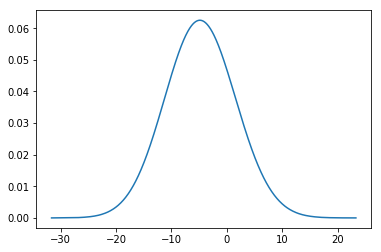

In [26]:
plt.plot(s_x, s_y)

In [27]:
o_x = [float(x) for x in data['over_under_x']]
o_y = [float(x) for x in data['over_under_y']]

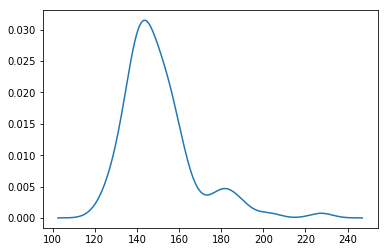

In [28]:
plt.plot(o_x, o_y)

In [7]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(spread)

In [29]:
home_points = [float(x) for x in data['home_points']]
away_points = [float(x) for x in data['away_points']]

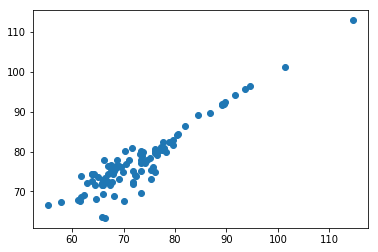

In [30]:
plt.scatter(home_points, away_points)

In [8]:
kde

KernelDensity(algorithm='auto', atol=0, bandwidth=0.75, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [10]:
kde.get_params()

{'algorithm': 'auto',
 'atol': 0,
 'bandwidth': 0.75,
 'breadth_first': True,
 'kernel': 'gaussian',
 'leaf_size': 40,
 'metric': 'euclidean',
 'metric_params': None,
 'rtol': 0}

In [14]:
from scipy.stats import gaussian_kde
new_kde = gaussian_kde(spread.reshape(-1, 1))

ValueError: array must not contain infs or NaNs

In [13]:
spread.shape

(100, 1)

In [17]:
from KDEpy import FFTKDE
estimator = FFTKDE(kernel='gaussian', bw='silverman')
x, y = estimator.fit(spread, weights=None).evaluate()


In [23]:
len(x)

1024

In [19]:
y

array([9.20215862e-07, 1.15621298e-06, 1.34197388e-06, ...,
       1.34197388e-06, 1.15621298e-06, 9.20215862e-07])

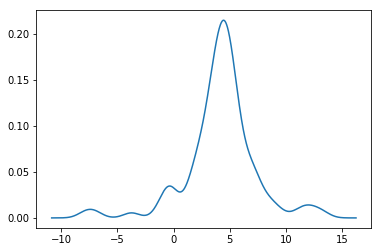

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,y)

In [21]:
estimator = FFTKDE(kernel='gaussian', bw='silverman')
x, y = estimator.fit(over_under, weights=None).evaluate()

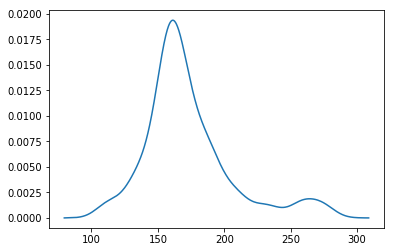

In [22]:
plt.plot(x,y)